# Problématique 

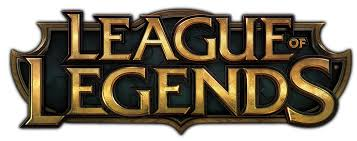



League Of Legends est une jeu vidéo en ligne multi-joueurs créer par RIOT Games joué par 30 millions des joueurs par mois selon les statistiques de 2018.

Alors pour gérer ce grand nombre des joueurs, Riot a mis en place plusieurs
serveur dans des déférente pays.

![LOL servers](https://www.unrankedsmurfs.com/storage/blogposts/how-many-lol-players-are-on-each-server/2017Regions.png)

Ce projet offre aux nouveaux joueurs un moyen de trouver un serveur offrant le meilleur ping pour leur localisation.

# Implémentation
---

In [1]:
import matplotlib.pyplot as plt
import networkx as nx


In [2]:

plt.rcParams['figure.figsize'] = [100, 50]

source='R4'
node_size=3000
path_width=6
edge_color='yellow'
node_color="gray"
server_color="skyblue"
source_color="red"
target_color="orange"
Servers=('NA','EUW','BR','LAN','LAS','EUNE','OCE','RU','TR','JP','KR','PBE','CN')
Routers=('R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11','R12','R13','R14','R15','R16','R17','R18','R19','R20','R21')
graph = {
         'NA':{'R1':20,'R2':101},
         'R1':{'R2':100,'NA':20,'PBE':13},
         'R2':{'NA':101,'R1':100,'R3':150,'R4':16},
         'PBE':{'R1':13,'R3':16,'R21':10},
         'R3':{'R2':150,'PBE':16,'R4':18,'LAN':12},
         'R4':{'R2':16,'R3':18,'LAS':120,'R7':50},
         'LAN':{'R3':12,'R21':5,'R20':18,'R5':5},
         'R21':{'PBE':10,'LAN':5},
         'R20':{'LAN':18,'LAS':28},
         'R5':{'LAN':5,'LAS':23,'R6':12},

         'LAS':{'R20':28,'R4':120,'R5':23,'R6':21,'R18':15},
         'R6':{'R5':12,'BR':8,'LAS':21},
         'BR':{'R6':8,'R18':42},
         'R18':{'LAS':15,'BR':42,'R16':12,'R7':22},
         'R7':{'EUW':50,'R4':50,'R18':22},
         'EUW':{'R7':50,'R8':16},

         'R8':{'EUNE':10,'EUW':16,'R19':8,'R7':22},
         'R19':{'R16':10,'TR':16,'R8':8},
         'R16':{'R18':12,'R19':10,'R17':16},
         'TR':{'R19':16,'R9':18,'R14':4},
         'R9':{'EUNE':20,'TR':20,'R11':10},
         'EUNE':{'R9':20,'R10':14,'R8':10},
         'R10':{'EUNE':14,'RU':15,'R11':11},
         'RU':{'R10':15,'R12':30},
         'R11':{'R10':11,'R9':10,'R12':6},
         'R12':{'RU':30,'R11':6,'CN':12,'KR':5},

         'KR':{'R12':5,'R13':8},
         'CN':{'R12':12,'R13':6,'R14':5},
         'R13':{'KR':8,'CN':6,'JP':2},
         'R14':{'TR':4,'CN':5,'JP':3,'R15':4},
         'JP':{'R13':2,'R14':3},
         'R15':{'R14':4,'R17':6,'OCE':15},
         'R17':{'R16':16,'R15':6,'OCE':20},
         'OCE':{'R17':20,'R15':15},
         }


In [3]:

#dijkstra implementation
def dijkstra(graph,start,goal):
    shortest_distance = {}
    predecessor = {}
    unseenNodes = graph
    infinity = float('Inf')
    path = []
    for node in unseenNodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0

    while unseenNodes:
        minNode = None
        for node in unseenNodes:
            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode]:
                minNode = node

        for childNode, weight in graph[minNode].items():
            if weight + shortest_distance[minNode] < shortest_distance[childNode]:
                shortest_distance[childNode] = weight + shortest_distance[minNode]
                predecessor[childNode] = minNode
        unseenNodes.pop(minNode)

    currentNode = goal
    while currentNode != start:
        try:
            path.insert(0,currentNode)
            currentNode = predecessor[currentNode]
        except KeyError:
            print('Path not reachable')
            return(infinity,"Path not reachable") 
    path.insert(0,start)
    
    if shortest_distance[goal] != infinity:
        return shortest_distance[goal],path

#Function to show the graph using networkx library
def draw_graph(G,pos,edgelist,path_nodes=None,Target=None):
    all=[(u,v) for (u,v,d) in G.edges(data=True) ]
    
    nx.draw_networkx_nodes(G,pos,node_size=node_size,node_color=node_color)
    nx.draw_networkx_nodes(G,pos,node_size=node_size,nodelist =Servers,node_color=server_color)
    nx.draw_networkx_nodes(G,pos,node_size=node_size,nodelist ={source},node_color=source_color)
    
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
    nx.draw_networkx_edges(G,pos,edgelist=all,width=3)
    
    if(Target):
        path_nodes=[(path_nodes[i], path_nodes[i+1]) for i in range(len(path_nodes)-1)]
        nx.draw_networkx_edges(G,pos,edgelist=path_nodes,width=path_width,alpha=1,edge_color=edge_color)
        nx.draw_networkx_nodes(G,pos,node_size=node_size,nodelist ={Target},node_color=target_color)
        
    nx.draw_networkx_edge_labels(G,pos,edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
    plt.axis('off')
    
    if(Target):
        strr=F"Graph_for_{Target}"
        plt.savefig(strr+".png",format="PNG")
        print(F'\n\t\t\t\t\tGraph for {Target} : ')
    else: 
        plt.savefig("Graph.png", format="PNG")
        print('\n\t\t\t\t\tGraphical Represintation : ')
    plt.show()
#Convert a path from a set to a human readable format
def show_path(path):
    i=1
    print(" ",end=" ")
    for node in path:
        print(node.upper()+" -> " if i<len(path) else node.upper()+"\n", end='')
        i+=1    



Enter a Router(R1->R21) to connect with : 
R4


		for better visualisation the graph will be saved as a png file in the project folder




C:\Users\ayman\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):



					Graphical Represintation : 


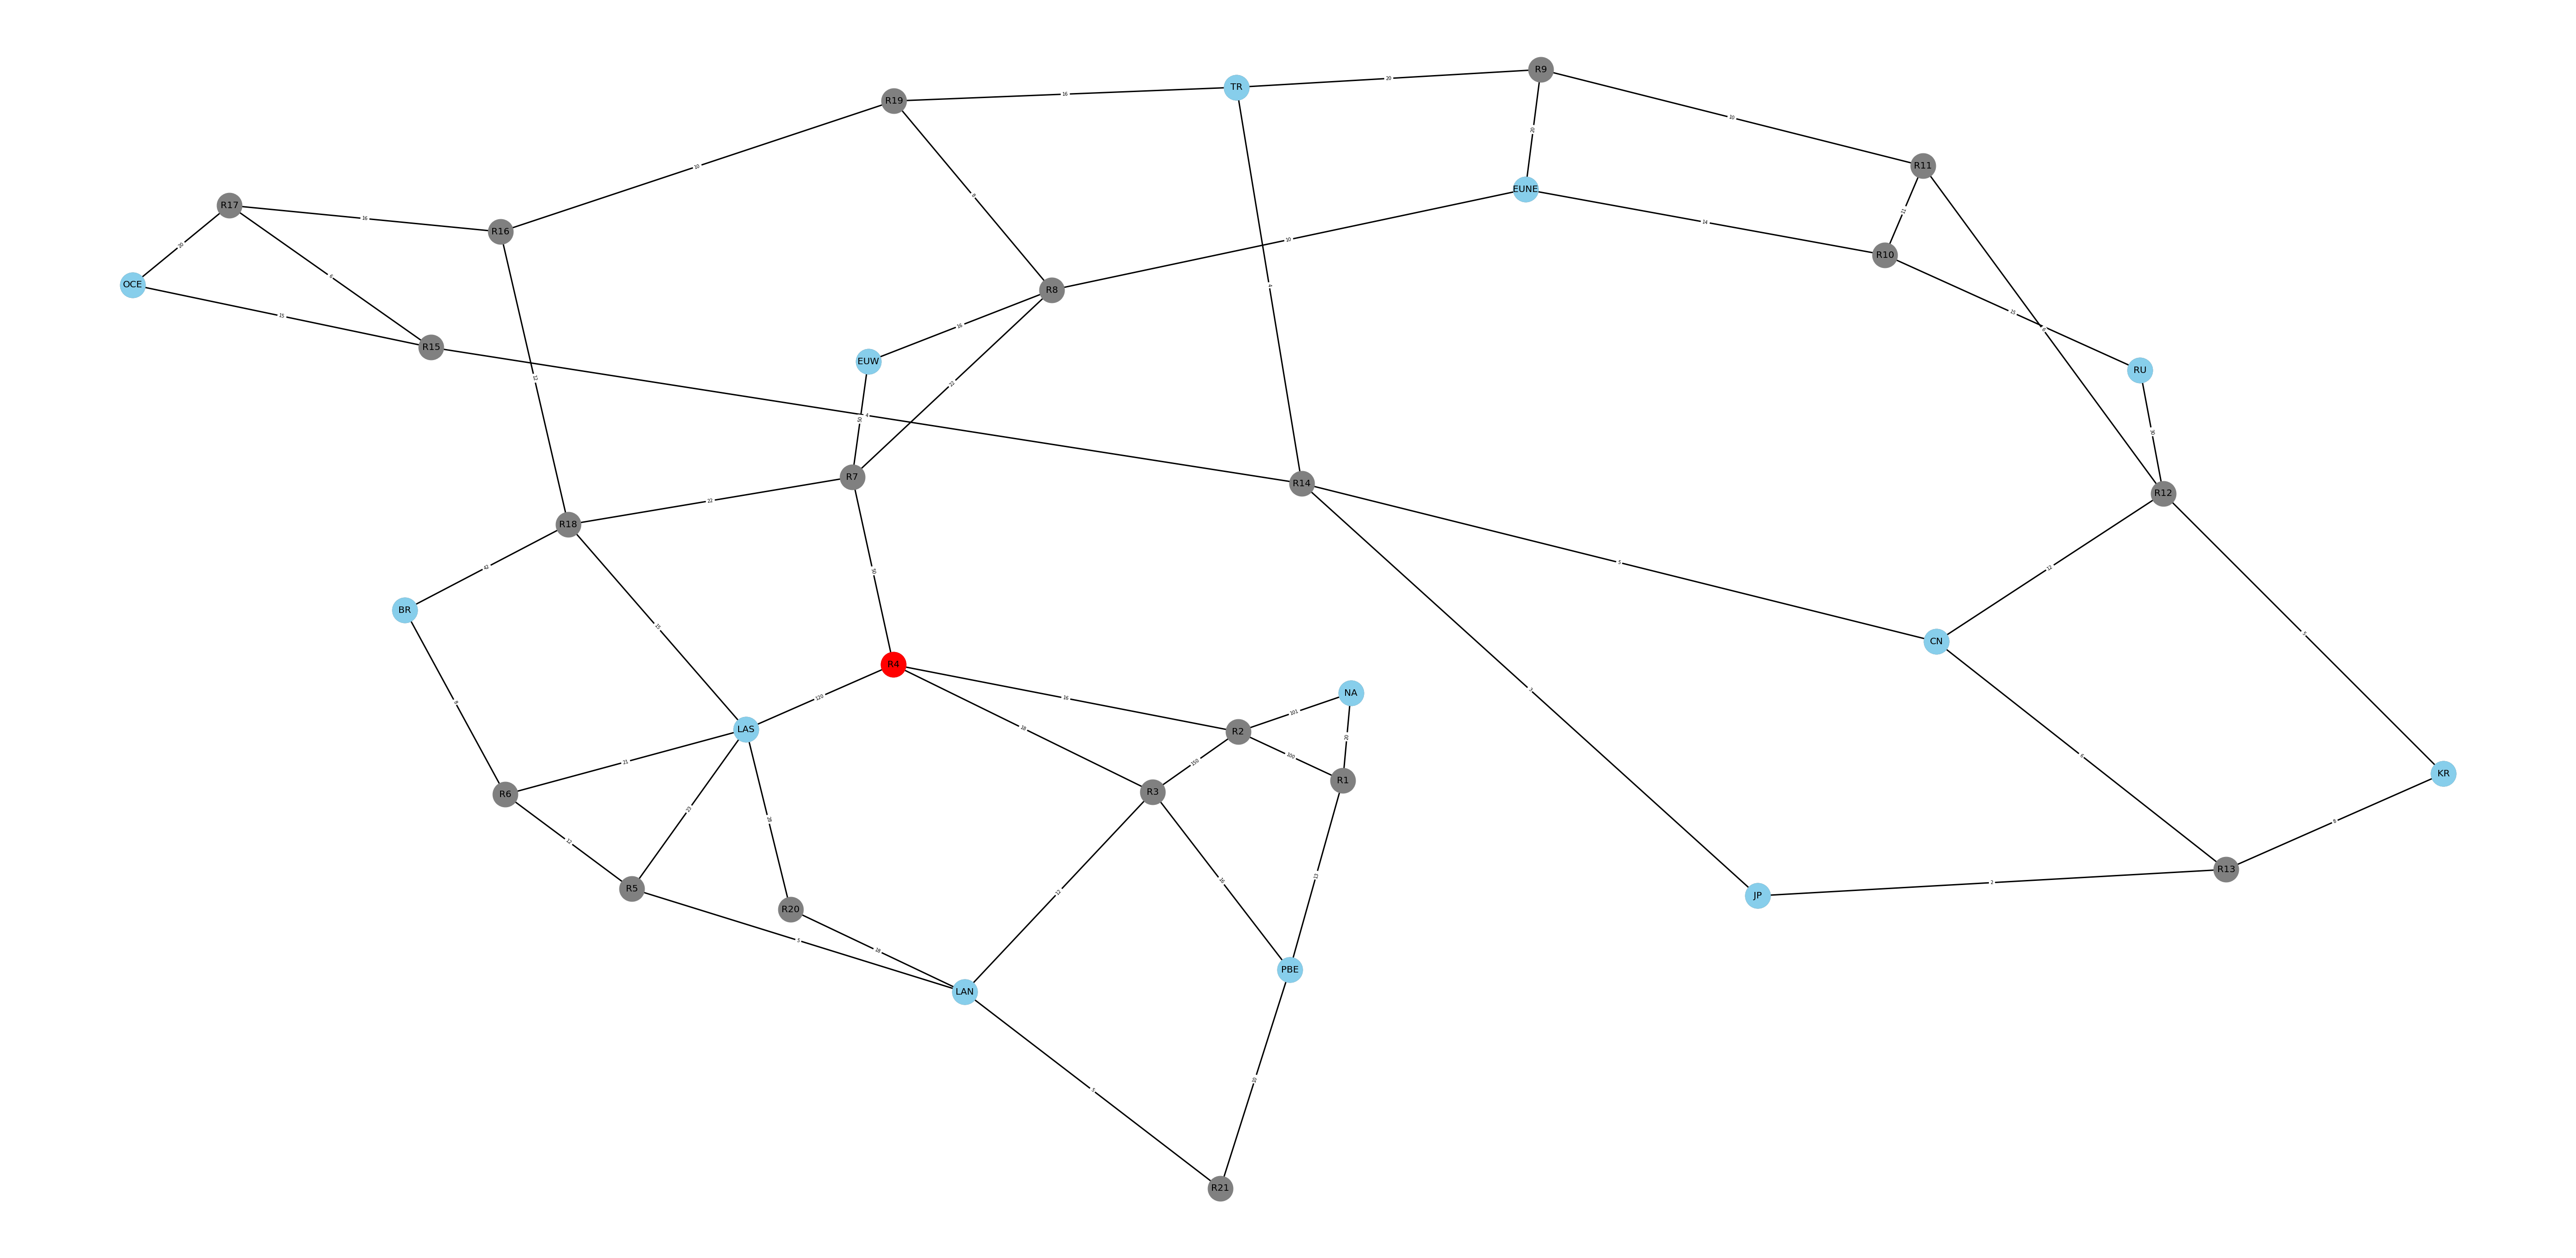

Shortest Path to play on  NA :   R4 -> R3 -> PBE -> R1 -> NA
in 67 ms

					Graph for NA : 


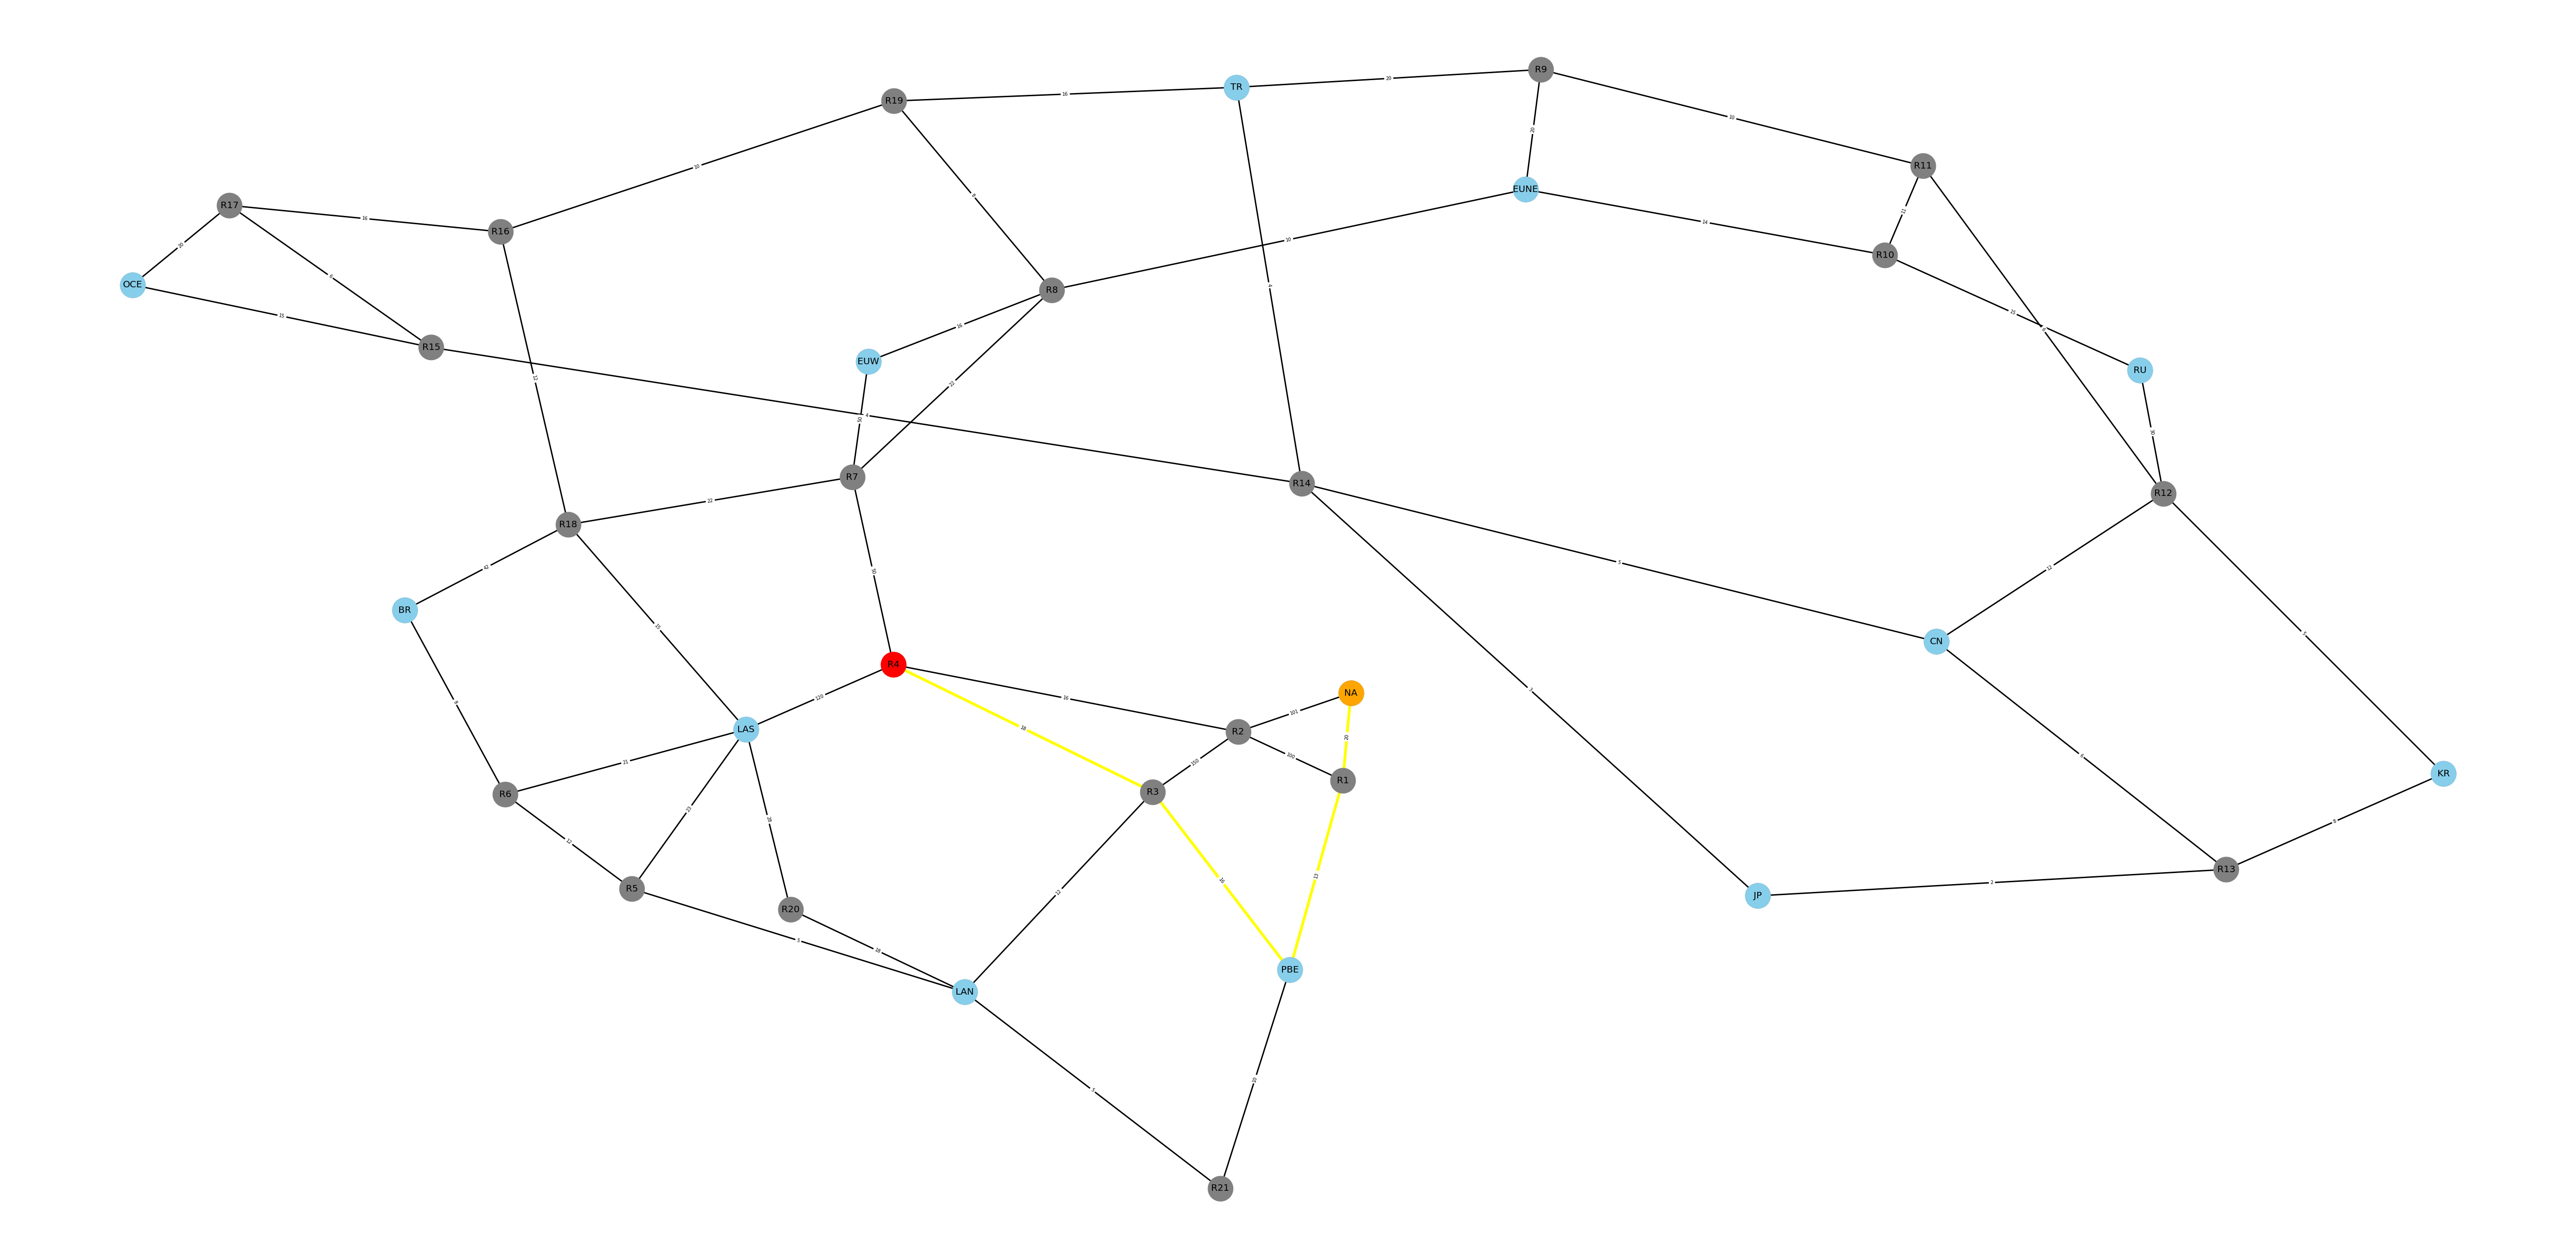

Shortest Path to play on  EUW :   R4 -> R7 -> EUW
in 100 ms

					Graph for EUW : 


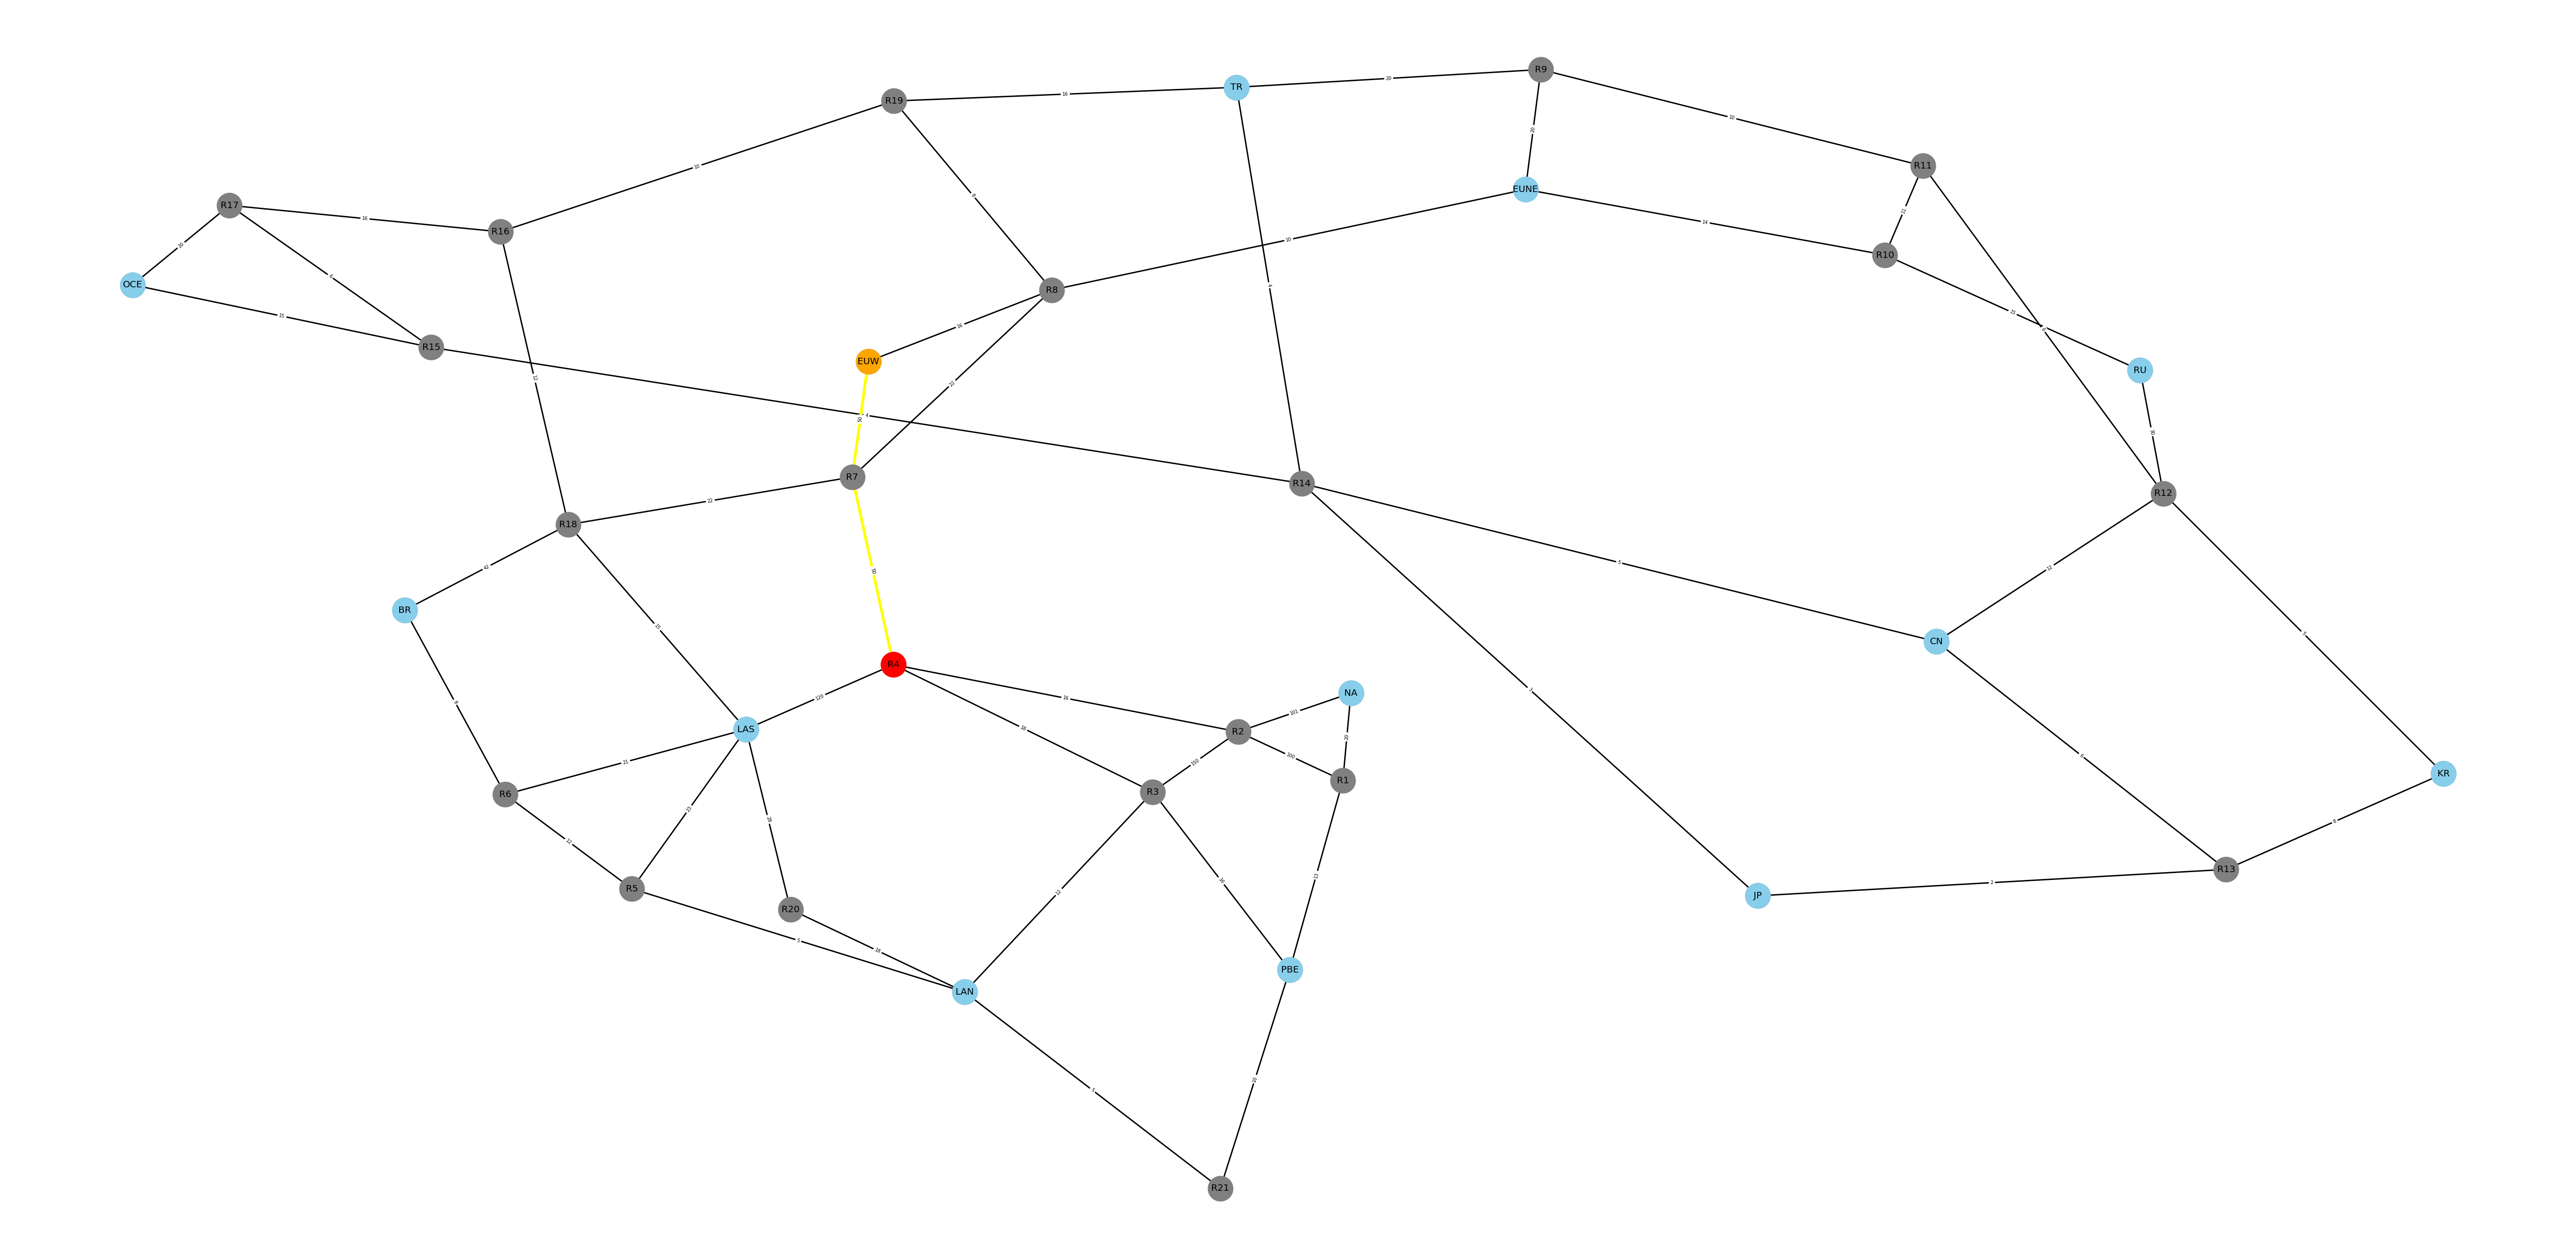

Shortest Path to play on  BR :   R4 -> R3 -> LAN -> R5 -> R6 -> BR
in 55 ms

					Graph for BR : 


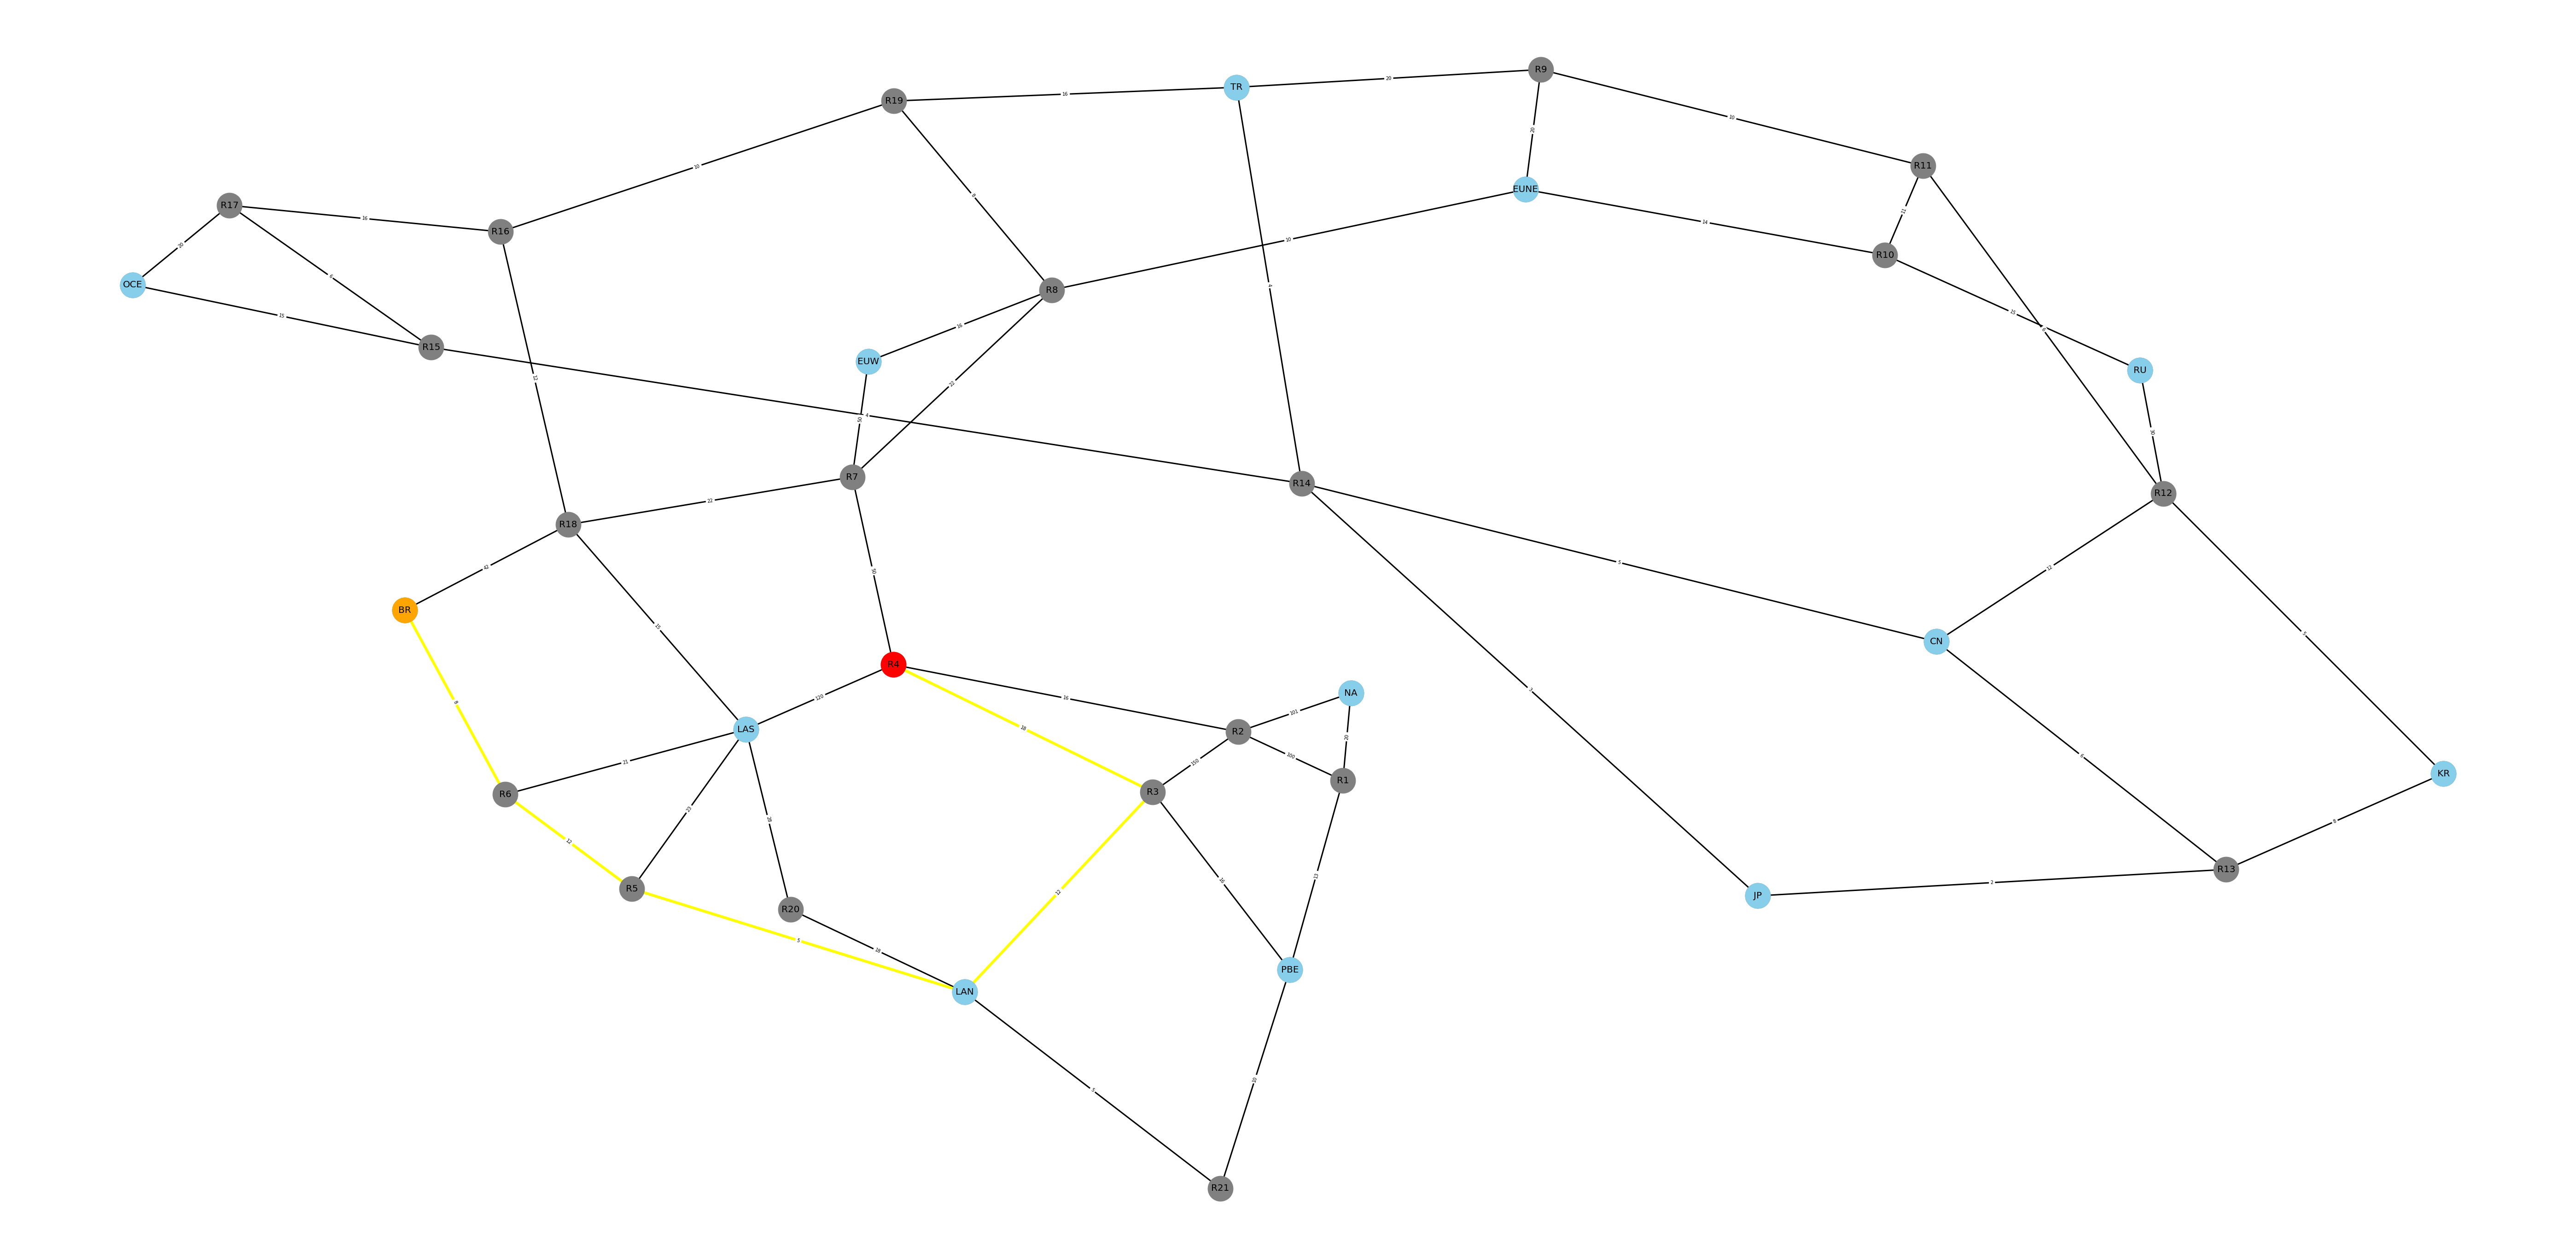

Shortest Path to play on  LAN :   R4 -> R3 -> LAN
in 30 ms

					Graph for LAN : 


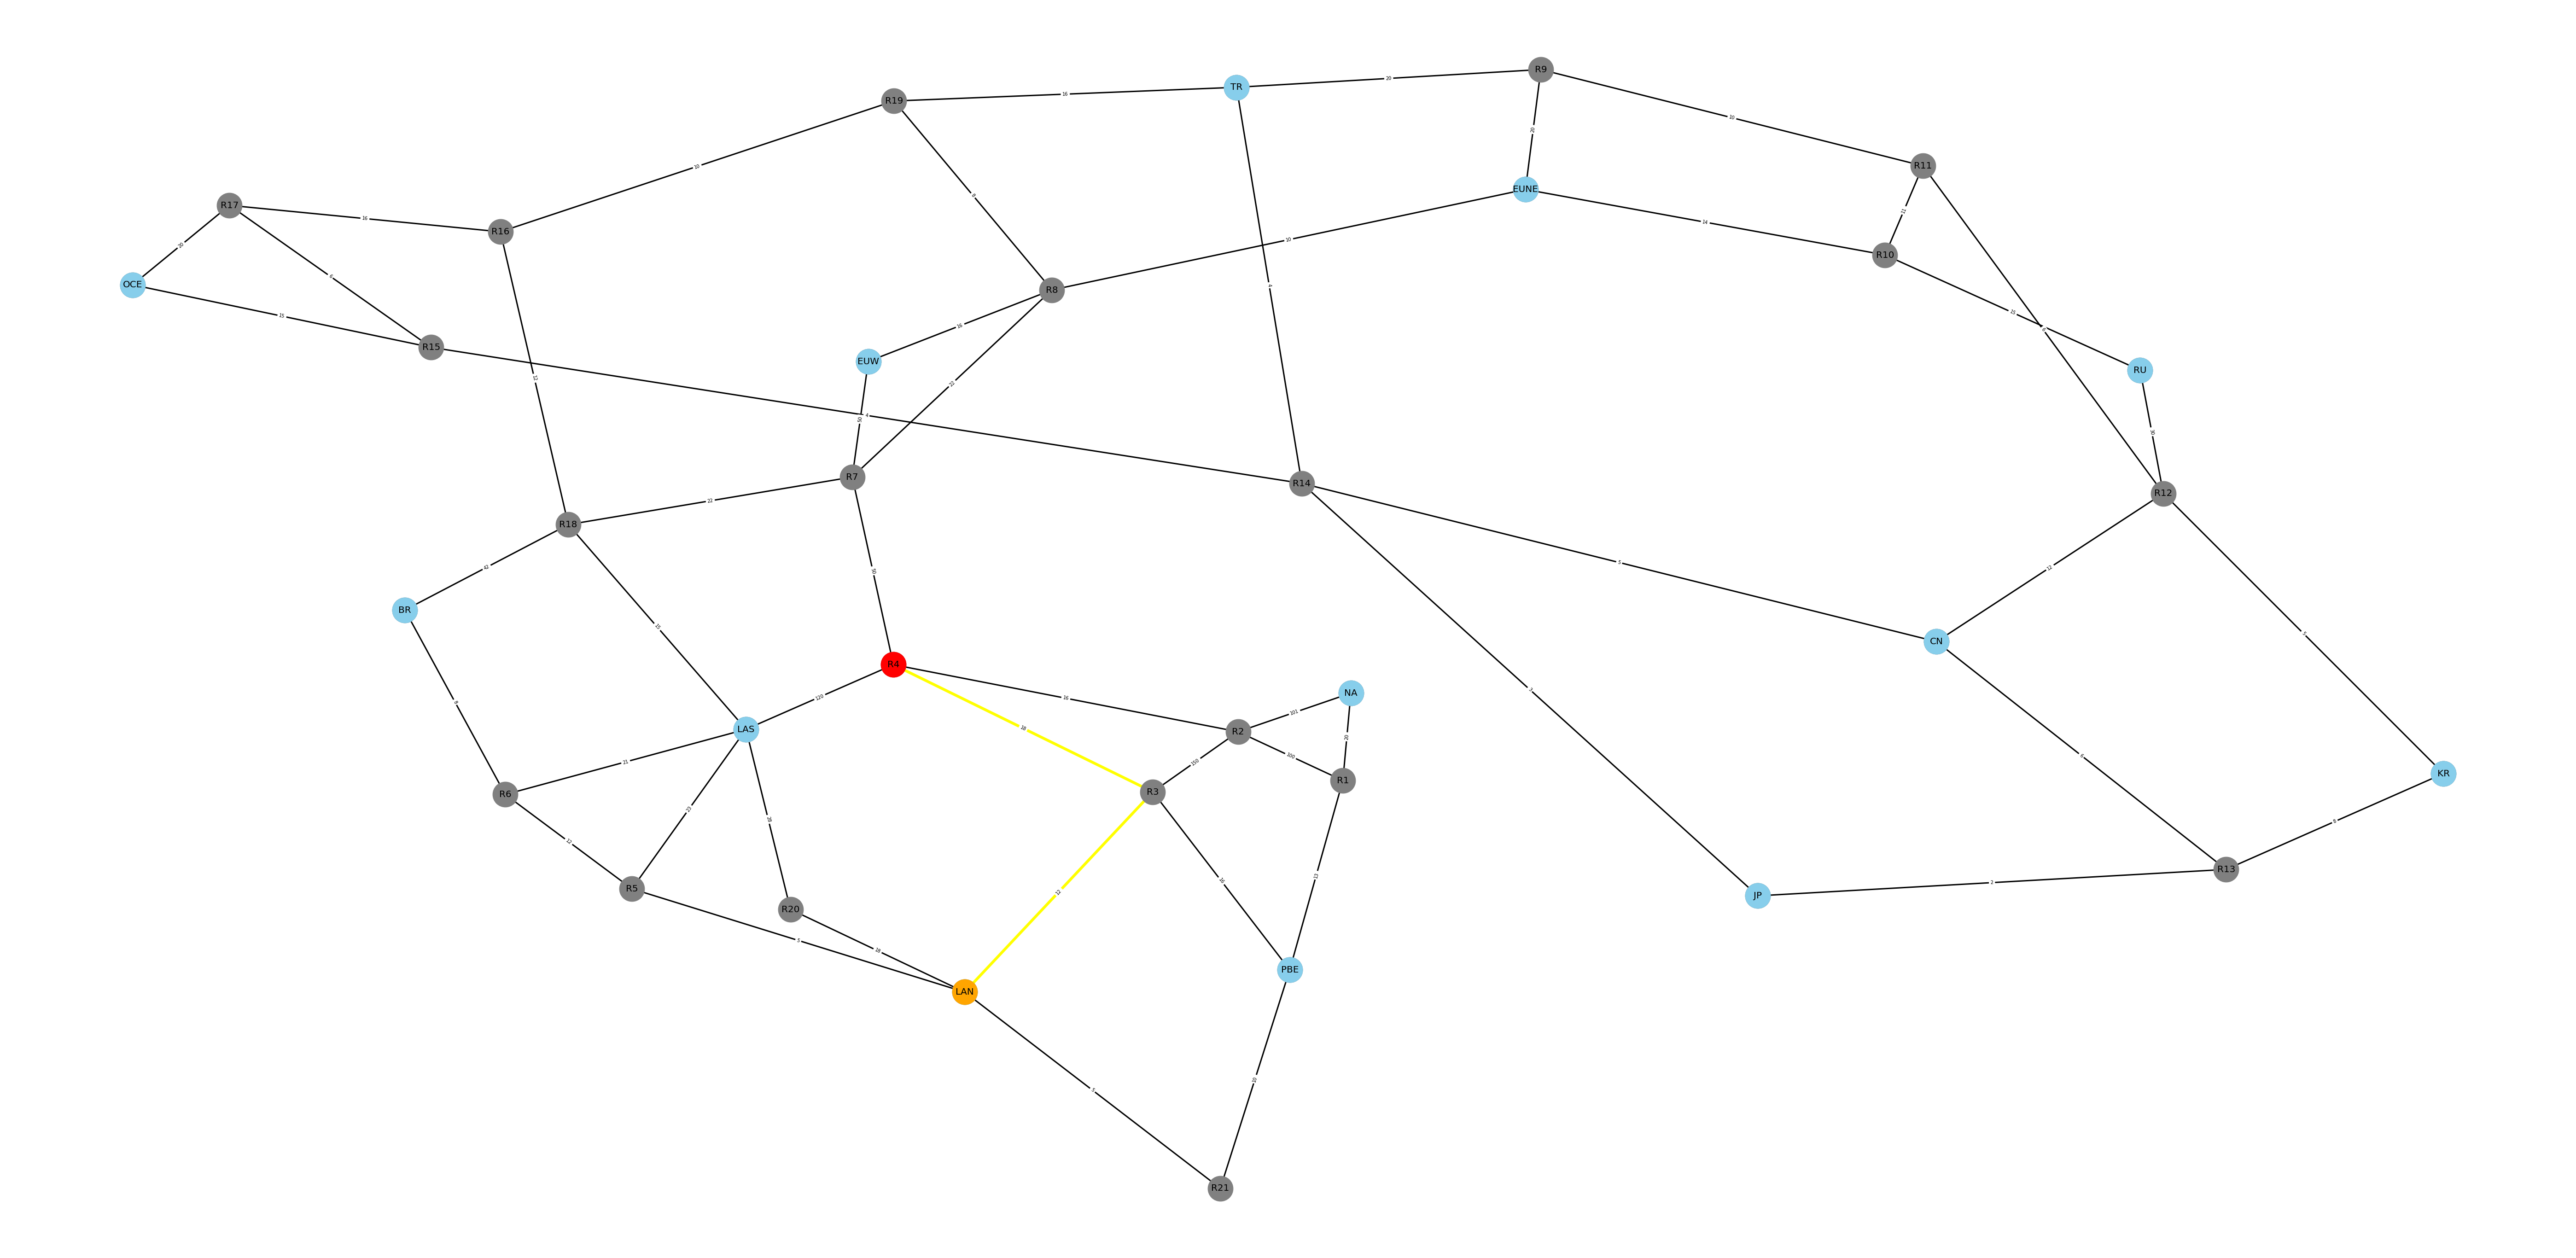

Shortest Path to play on  LAS :   R4 -> R3 -> LAN -> R5 -> LAS
in 58 ms

					Graph for LAS : 


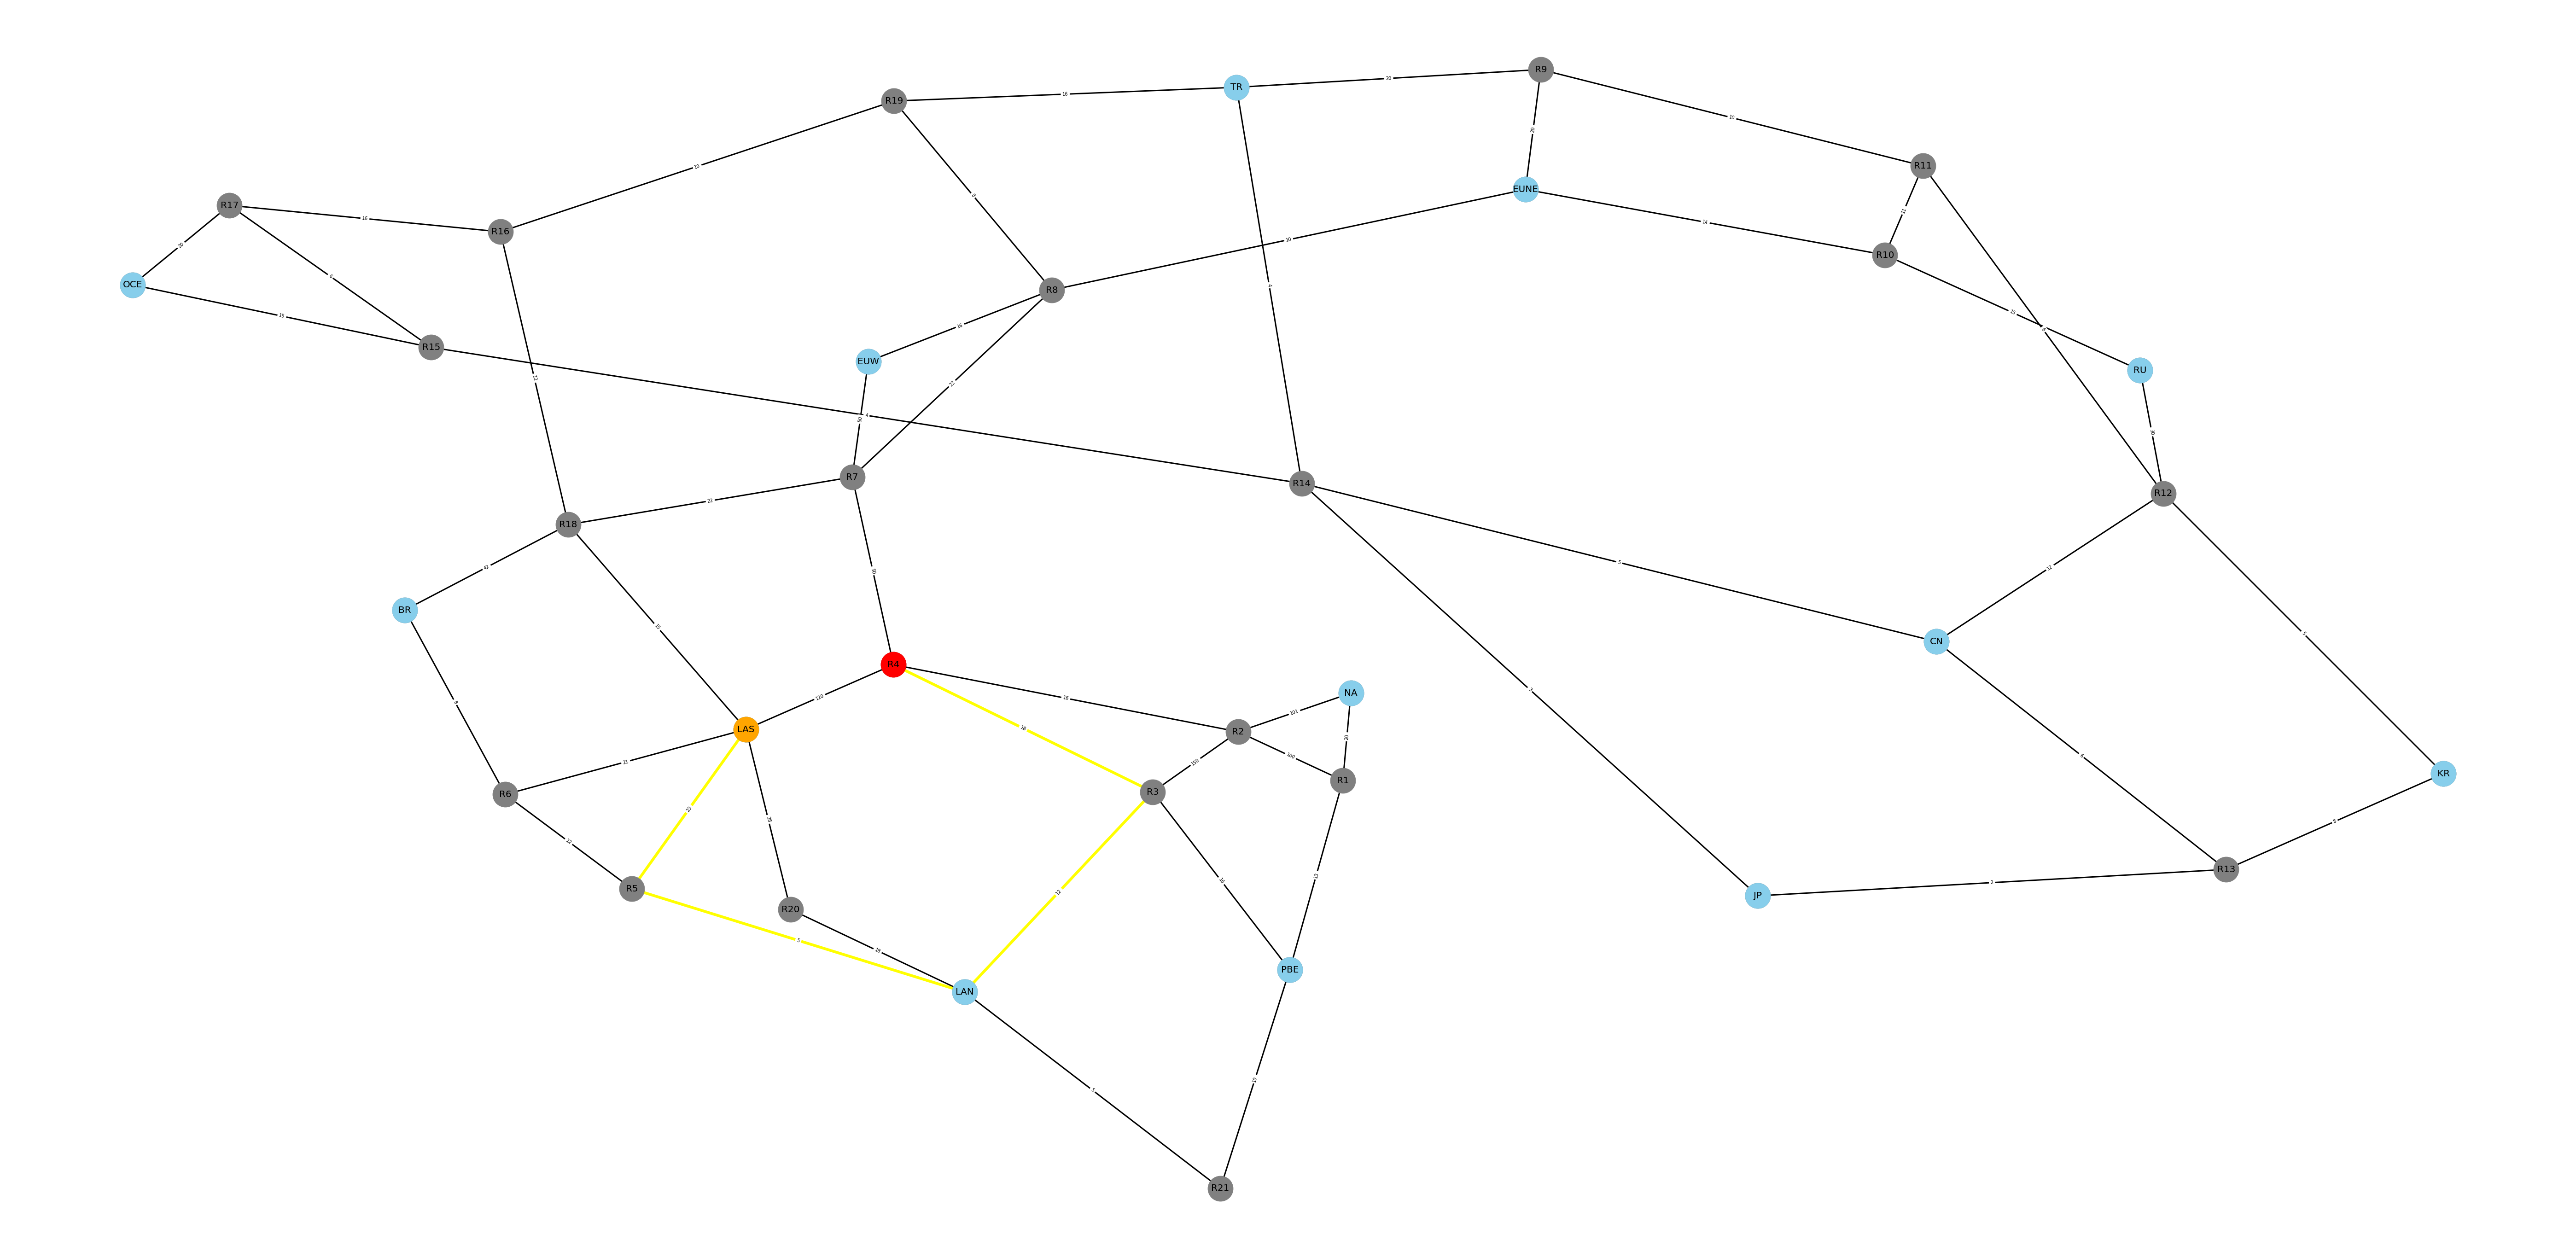

Shortest Path to play on  EUNE :   R4 -> R7 -> R18 -> R16 -> R19 -> R8 -> EUNE
in 112 ms

					Graph for EUNE : 


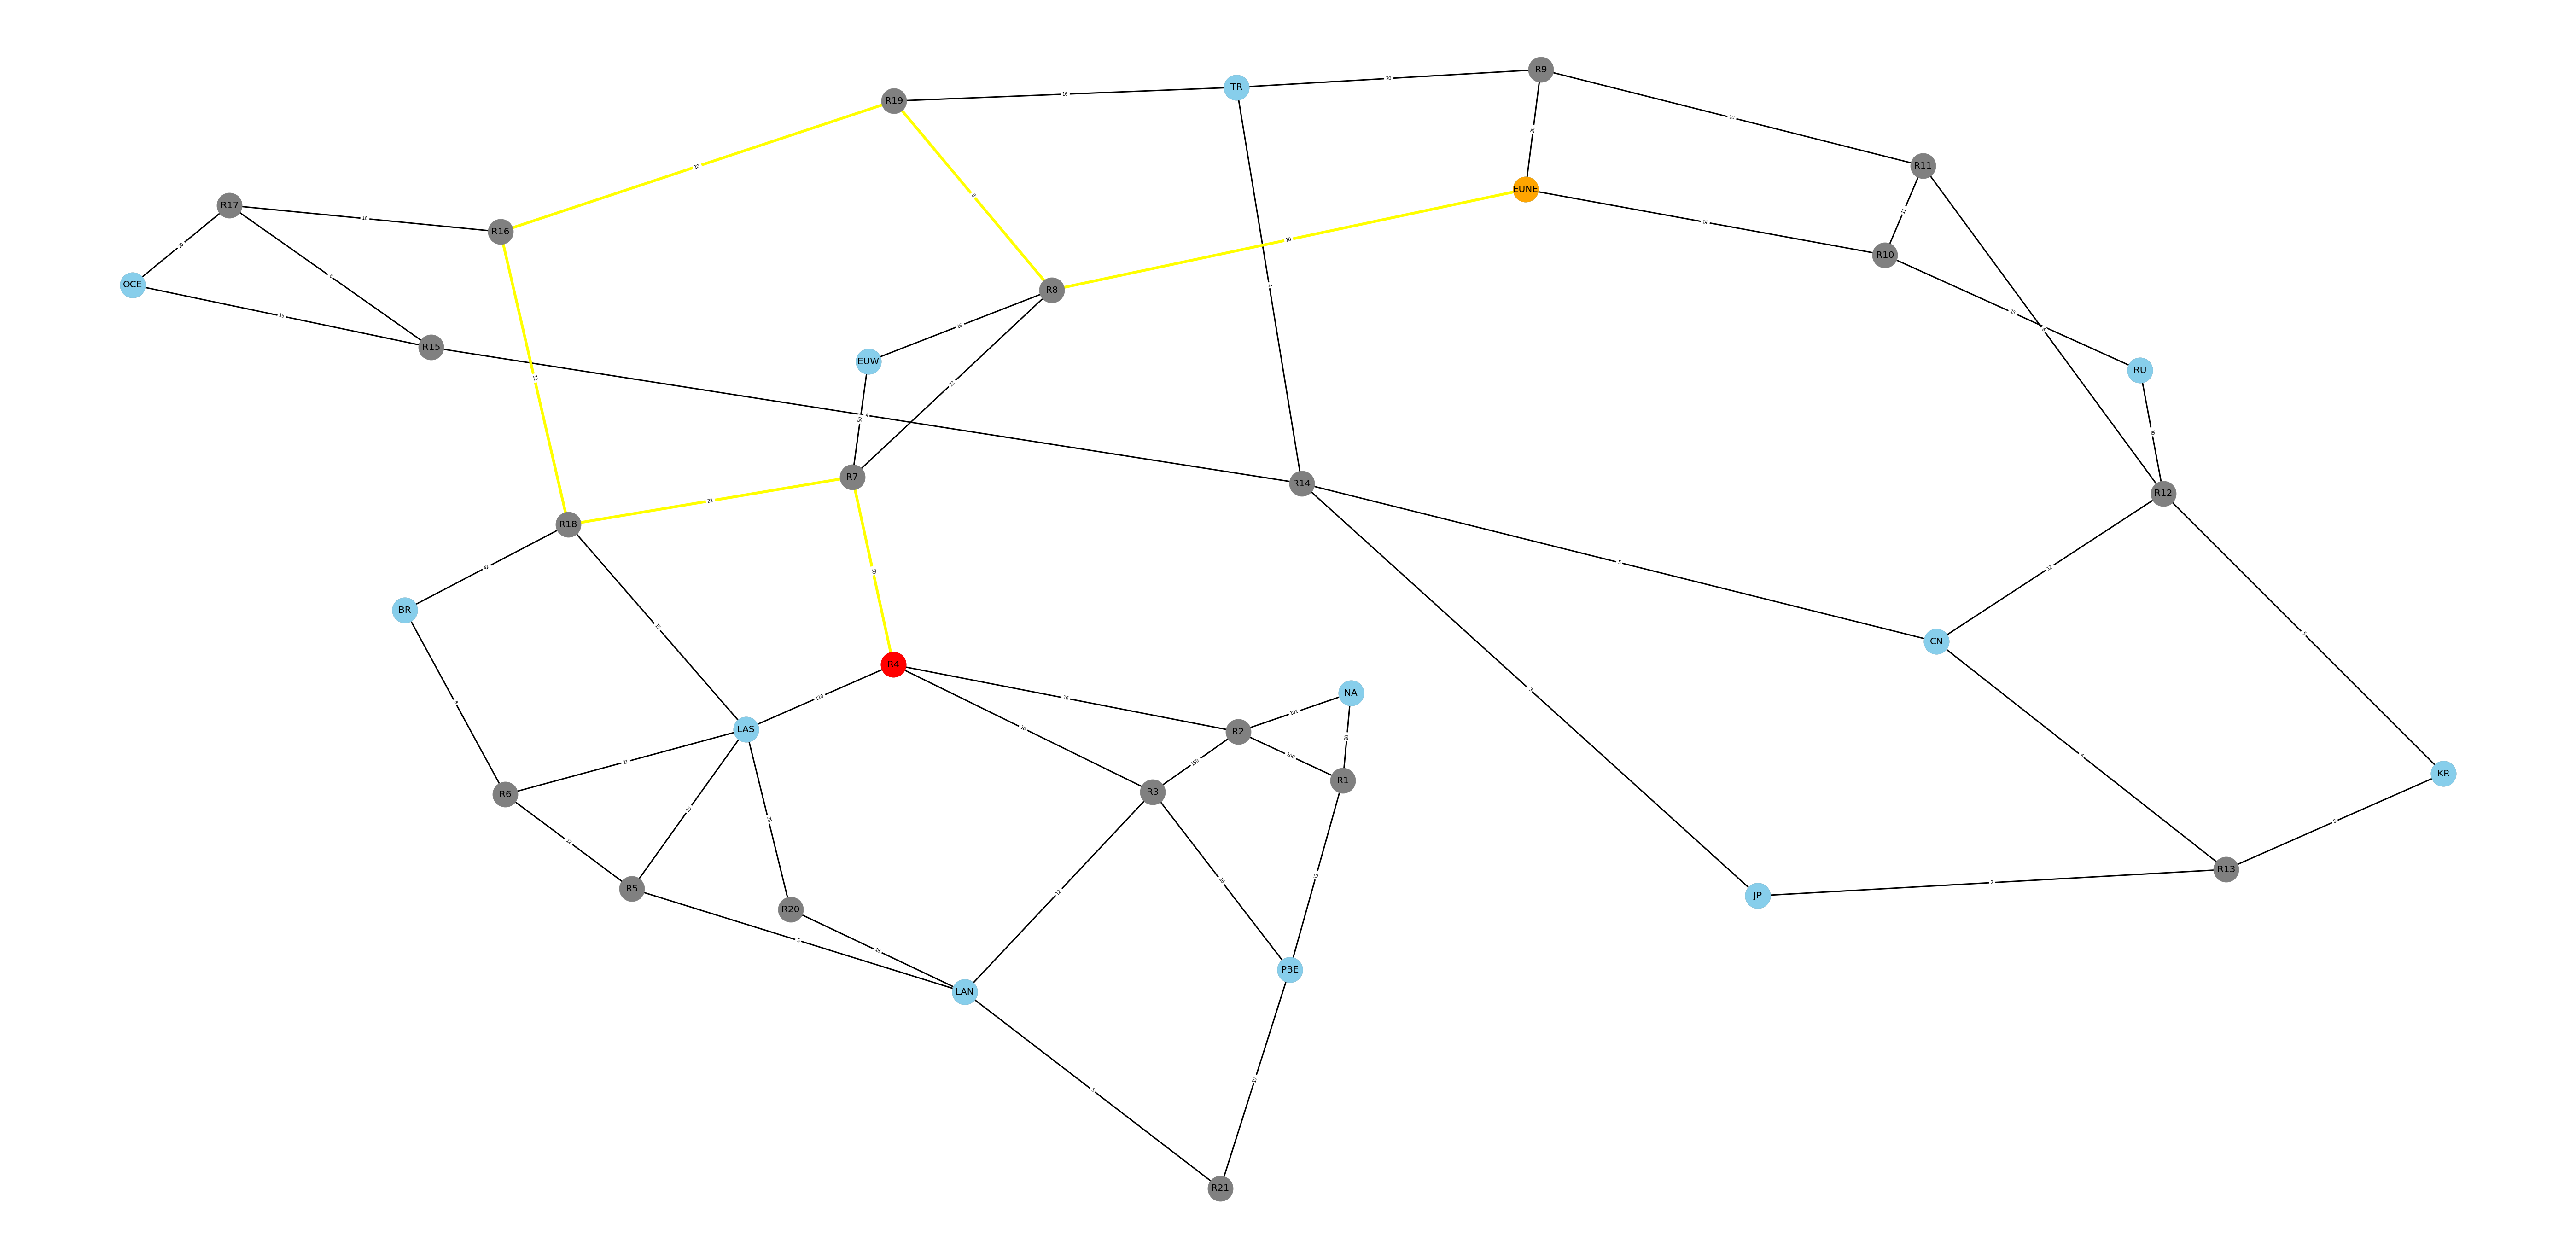

Shortest Path to play on  OCE :   R4 -> R7 -> R18 -> R16 -> R17 -> OCE
in 120 ms

					Graph for OCE : 


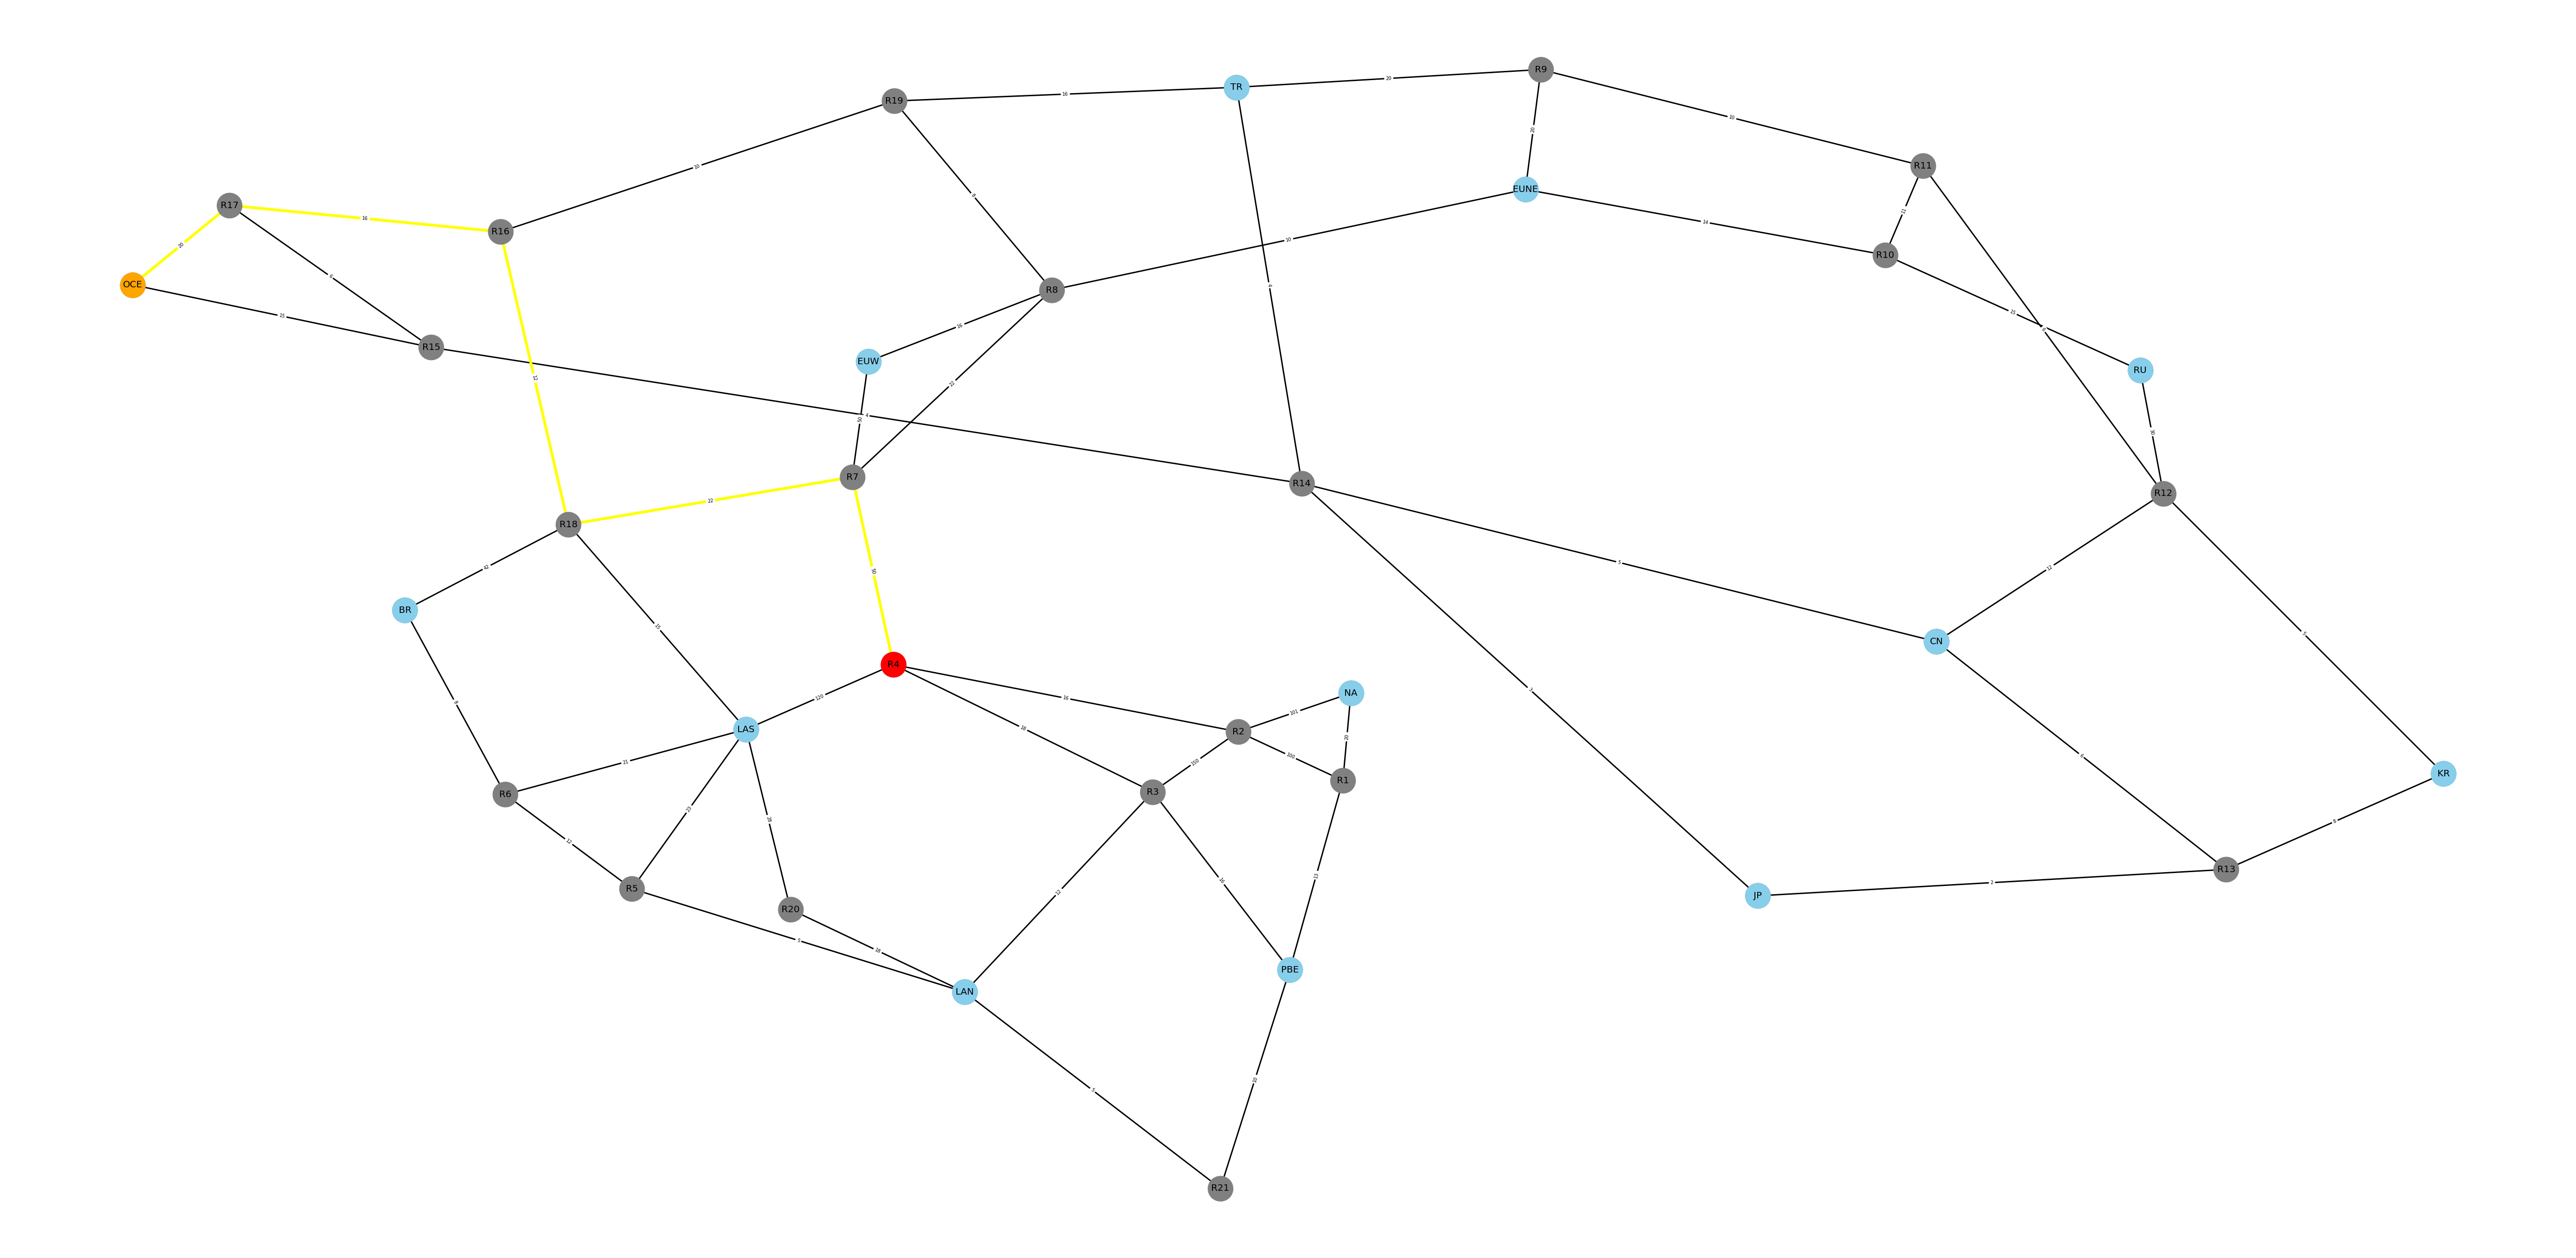

Shortest Path to play on  RU :   R4 -> R7 -> R18 -> R16 -> R19 -> R8 -> EUNE -> R10 -> RU
in 141 ms

					Graph for RU : 


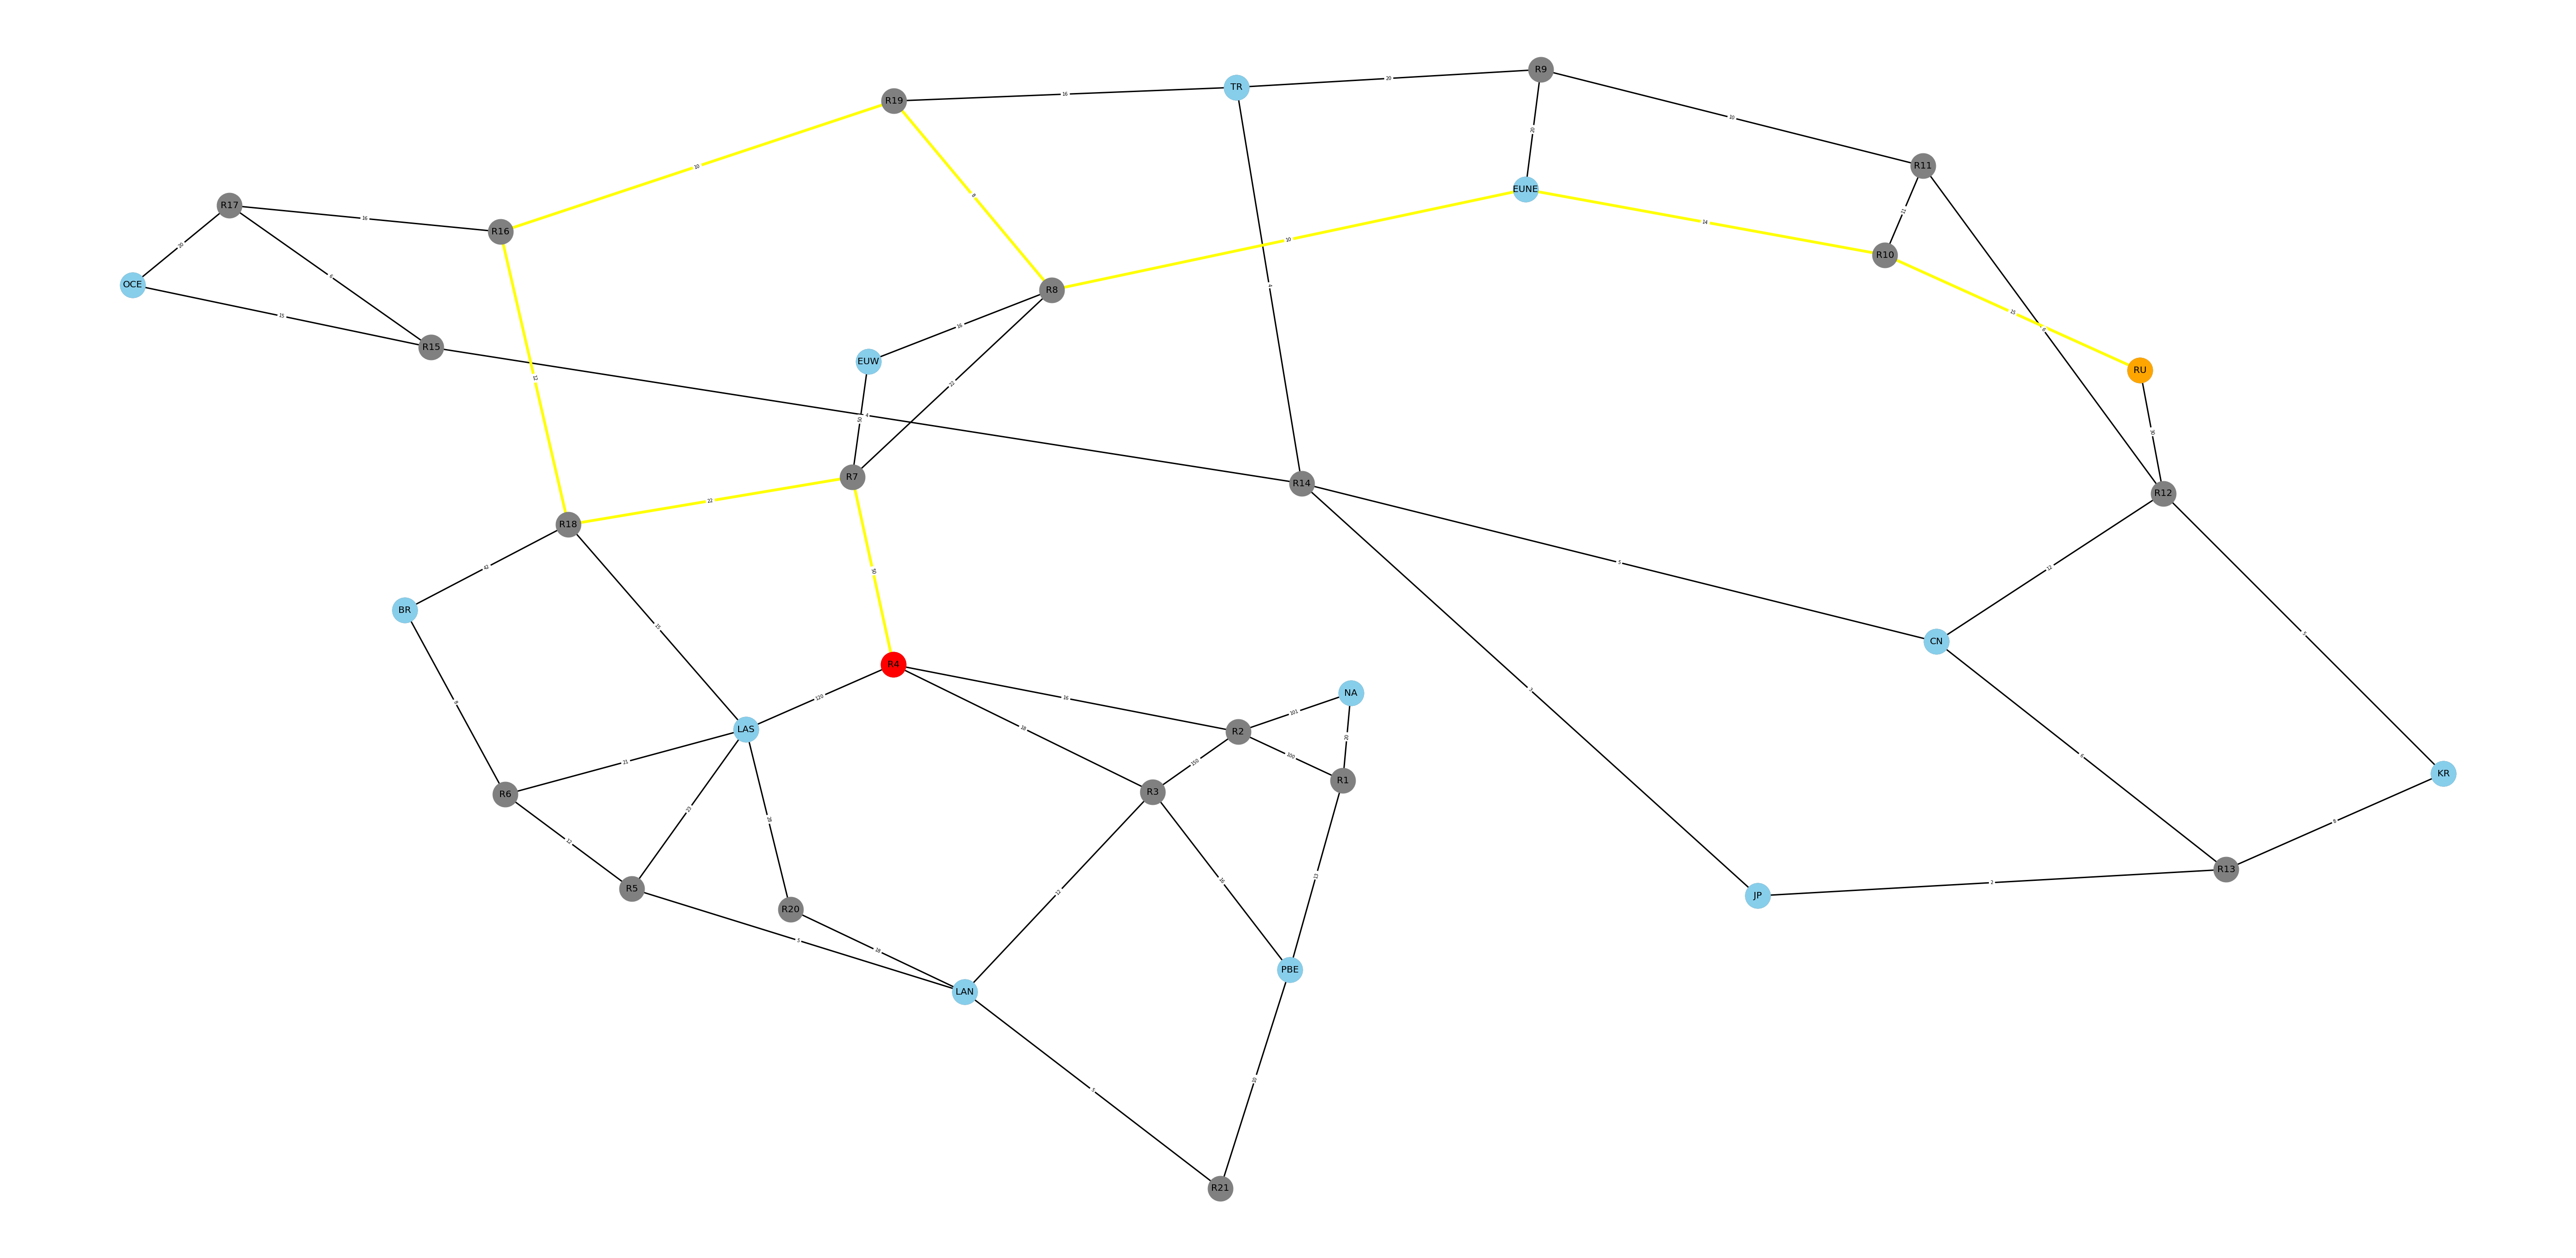

Shortest Path to play on  TR :   R4 -> R7 -> R18 -> R16 -> R19 -> TR
in 110 ms

					Graph for TR : 


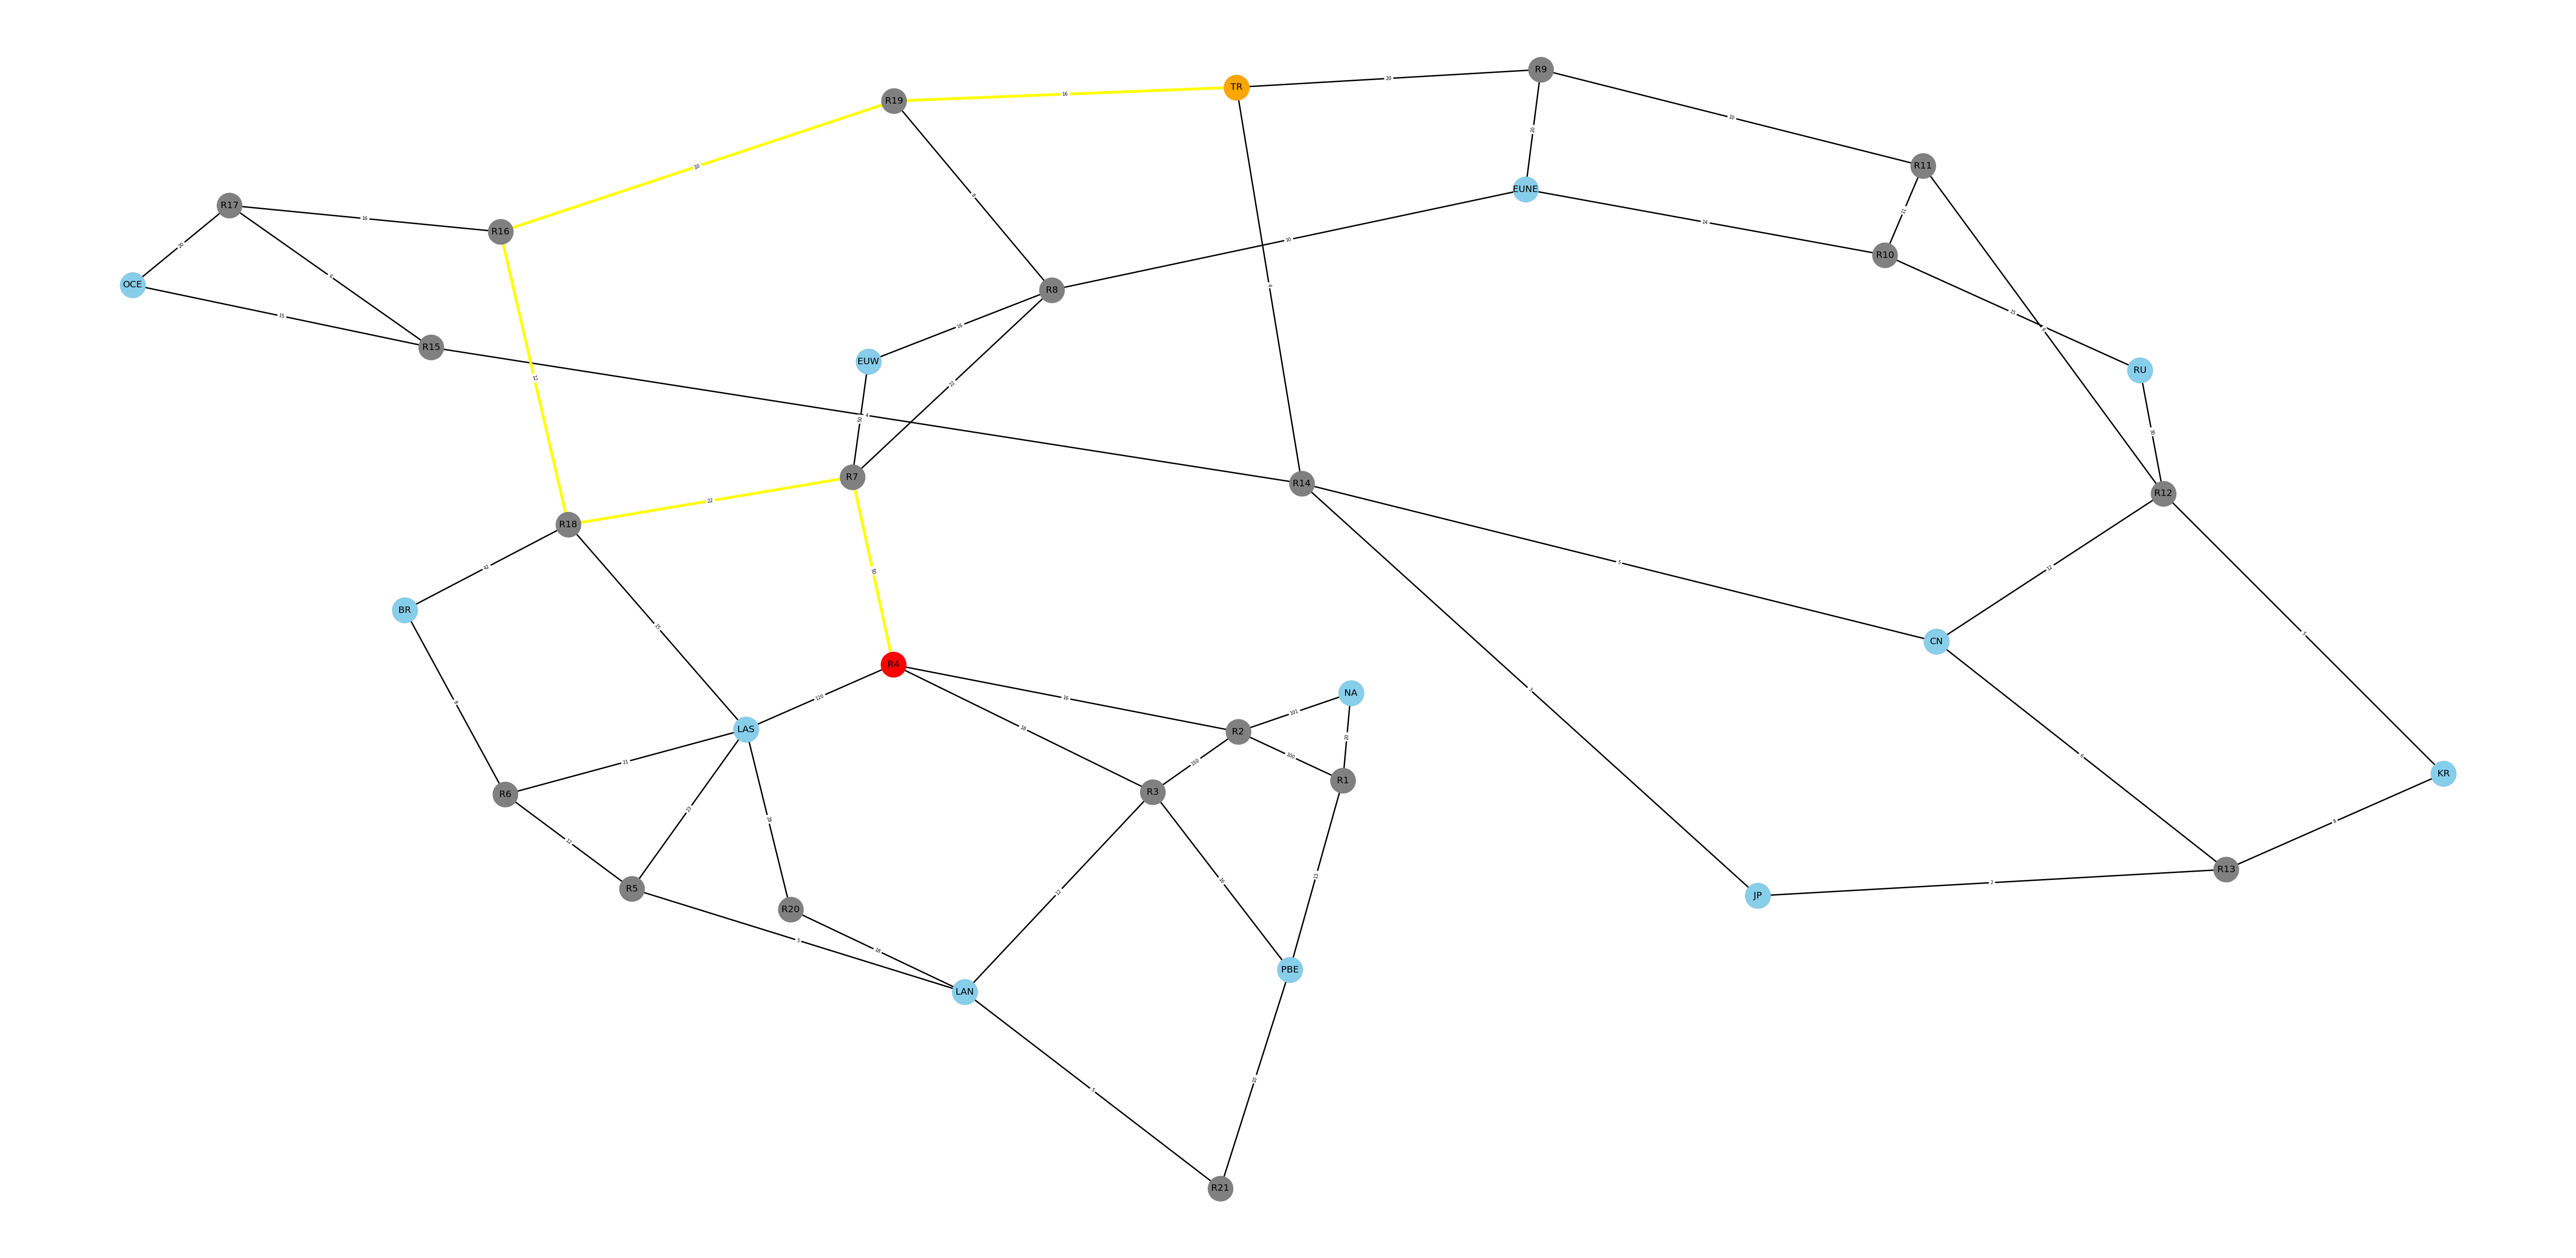

Shortest Path to play on  JP :   R4 -> R7 -> R18 -> R16 -> R17 -> R15 -> R14 -> JP
in 113 ms

					Graph for JP : 


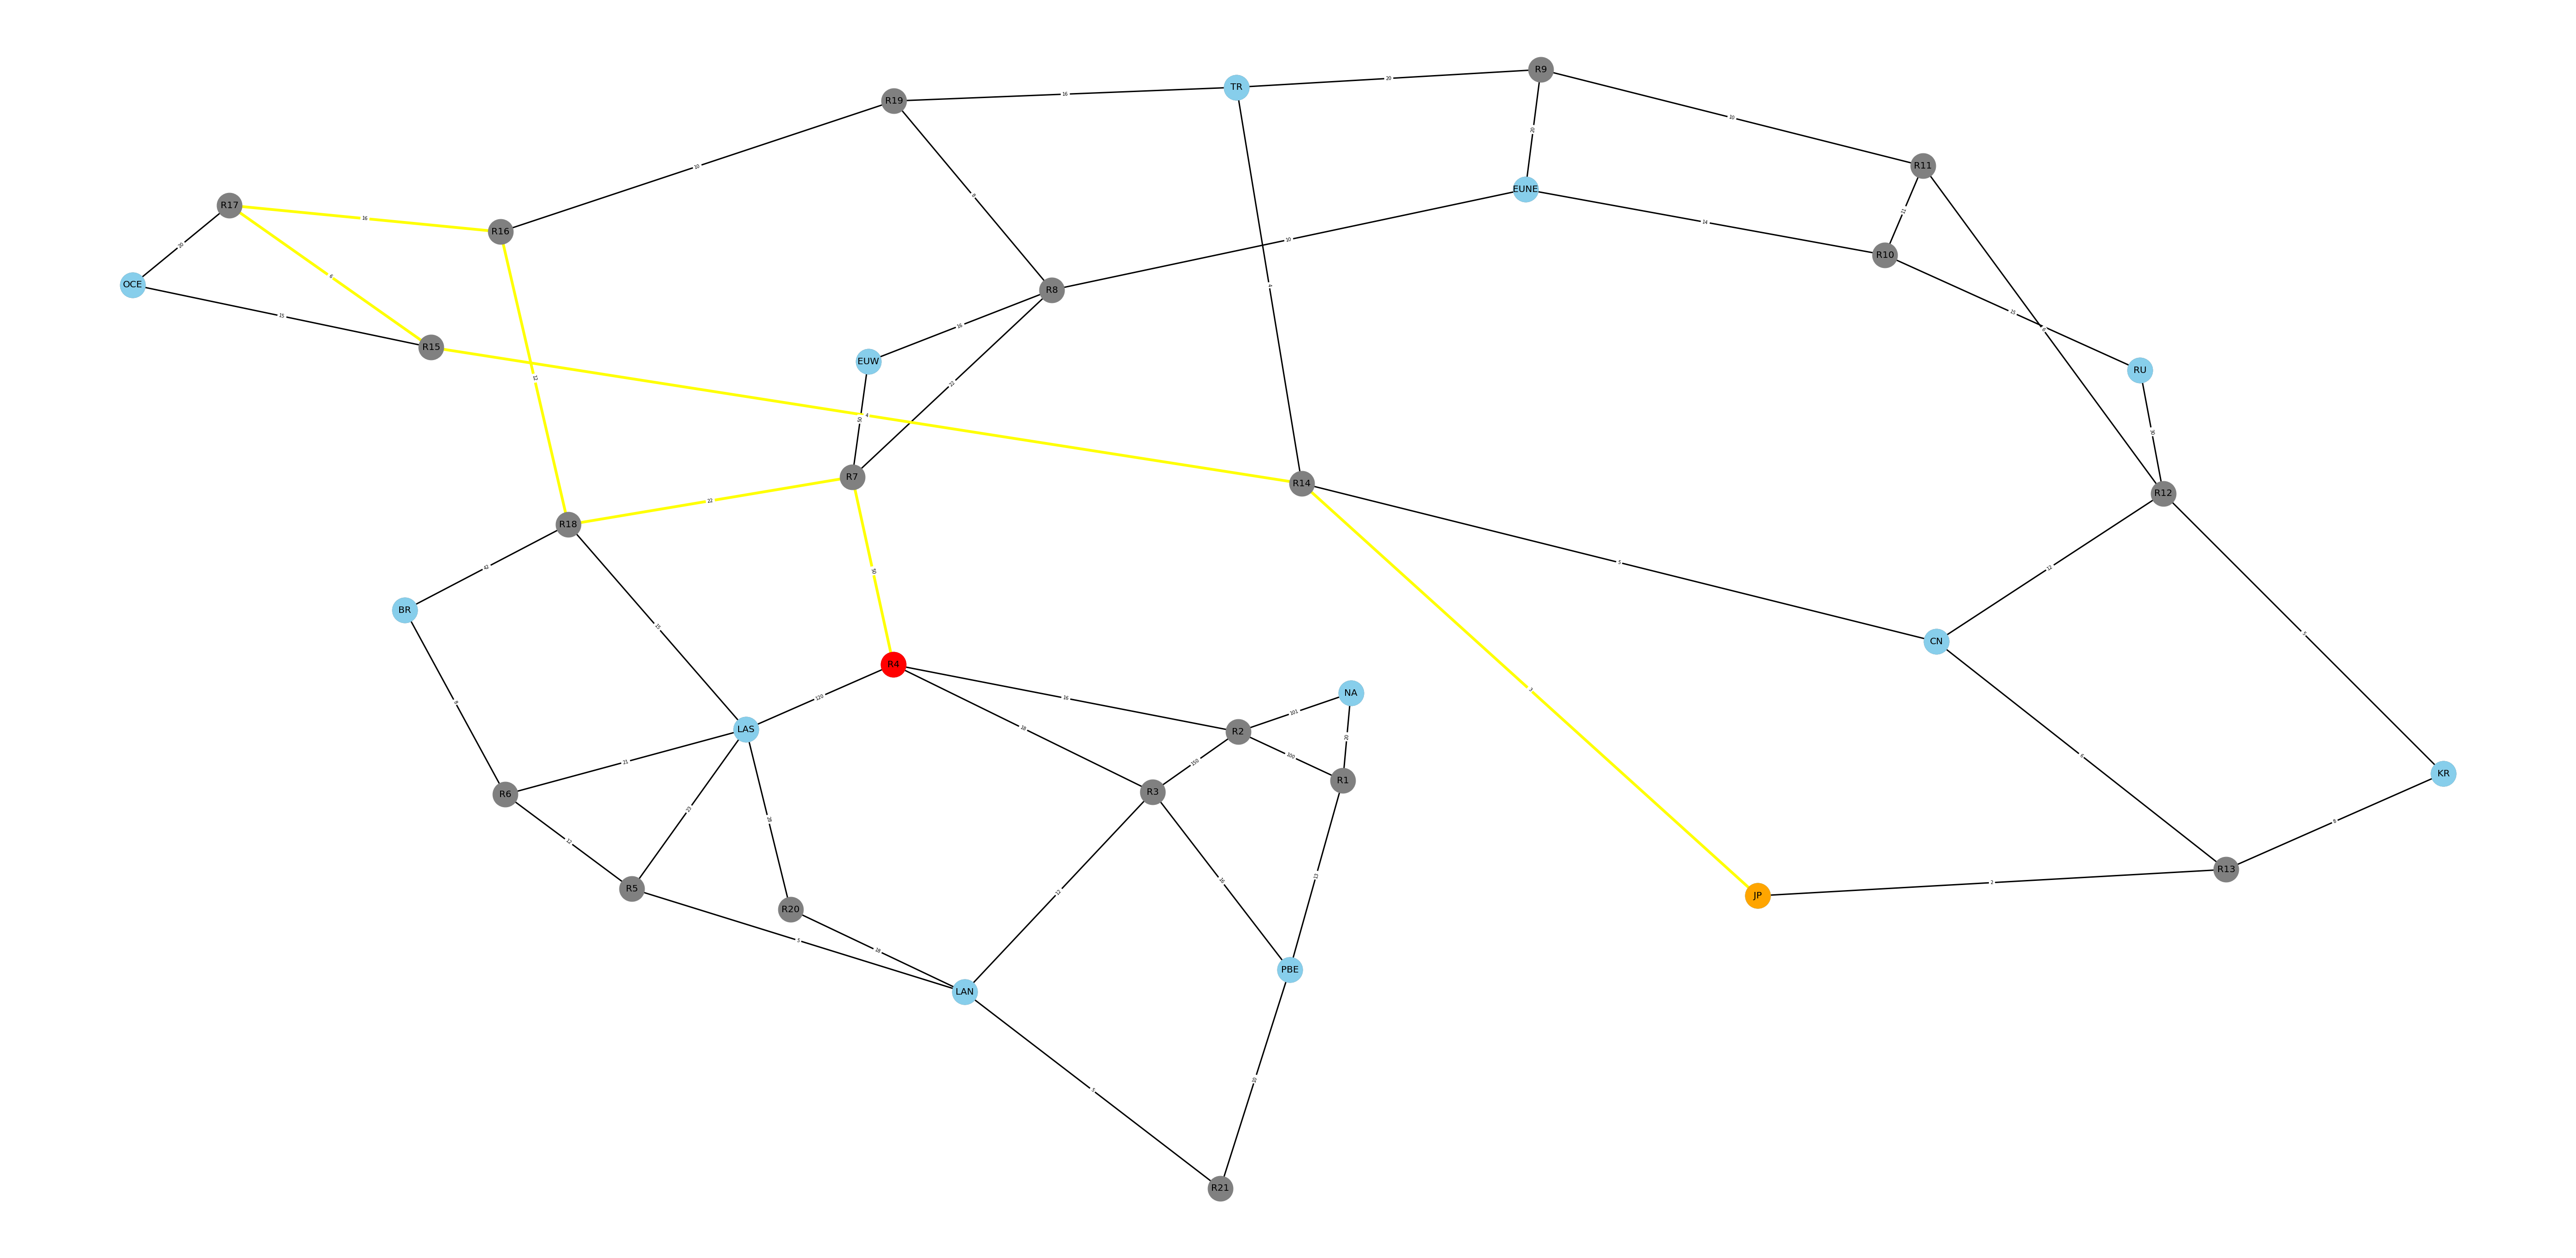

Shortest Path to play on  KR :   R4 -> R7 -> R18 -> R16 -> R17 -> R15 -> R14 -> JP -> R13 -> KR
in 123 ms

					Graph for KR : 


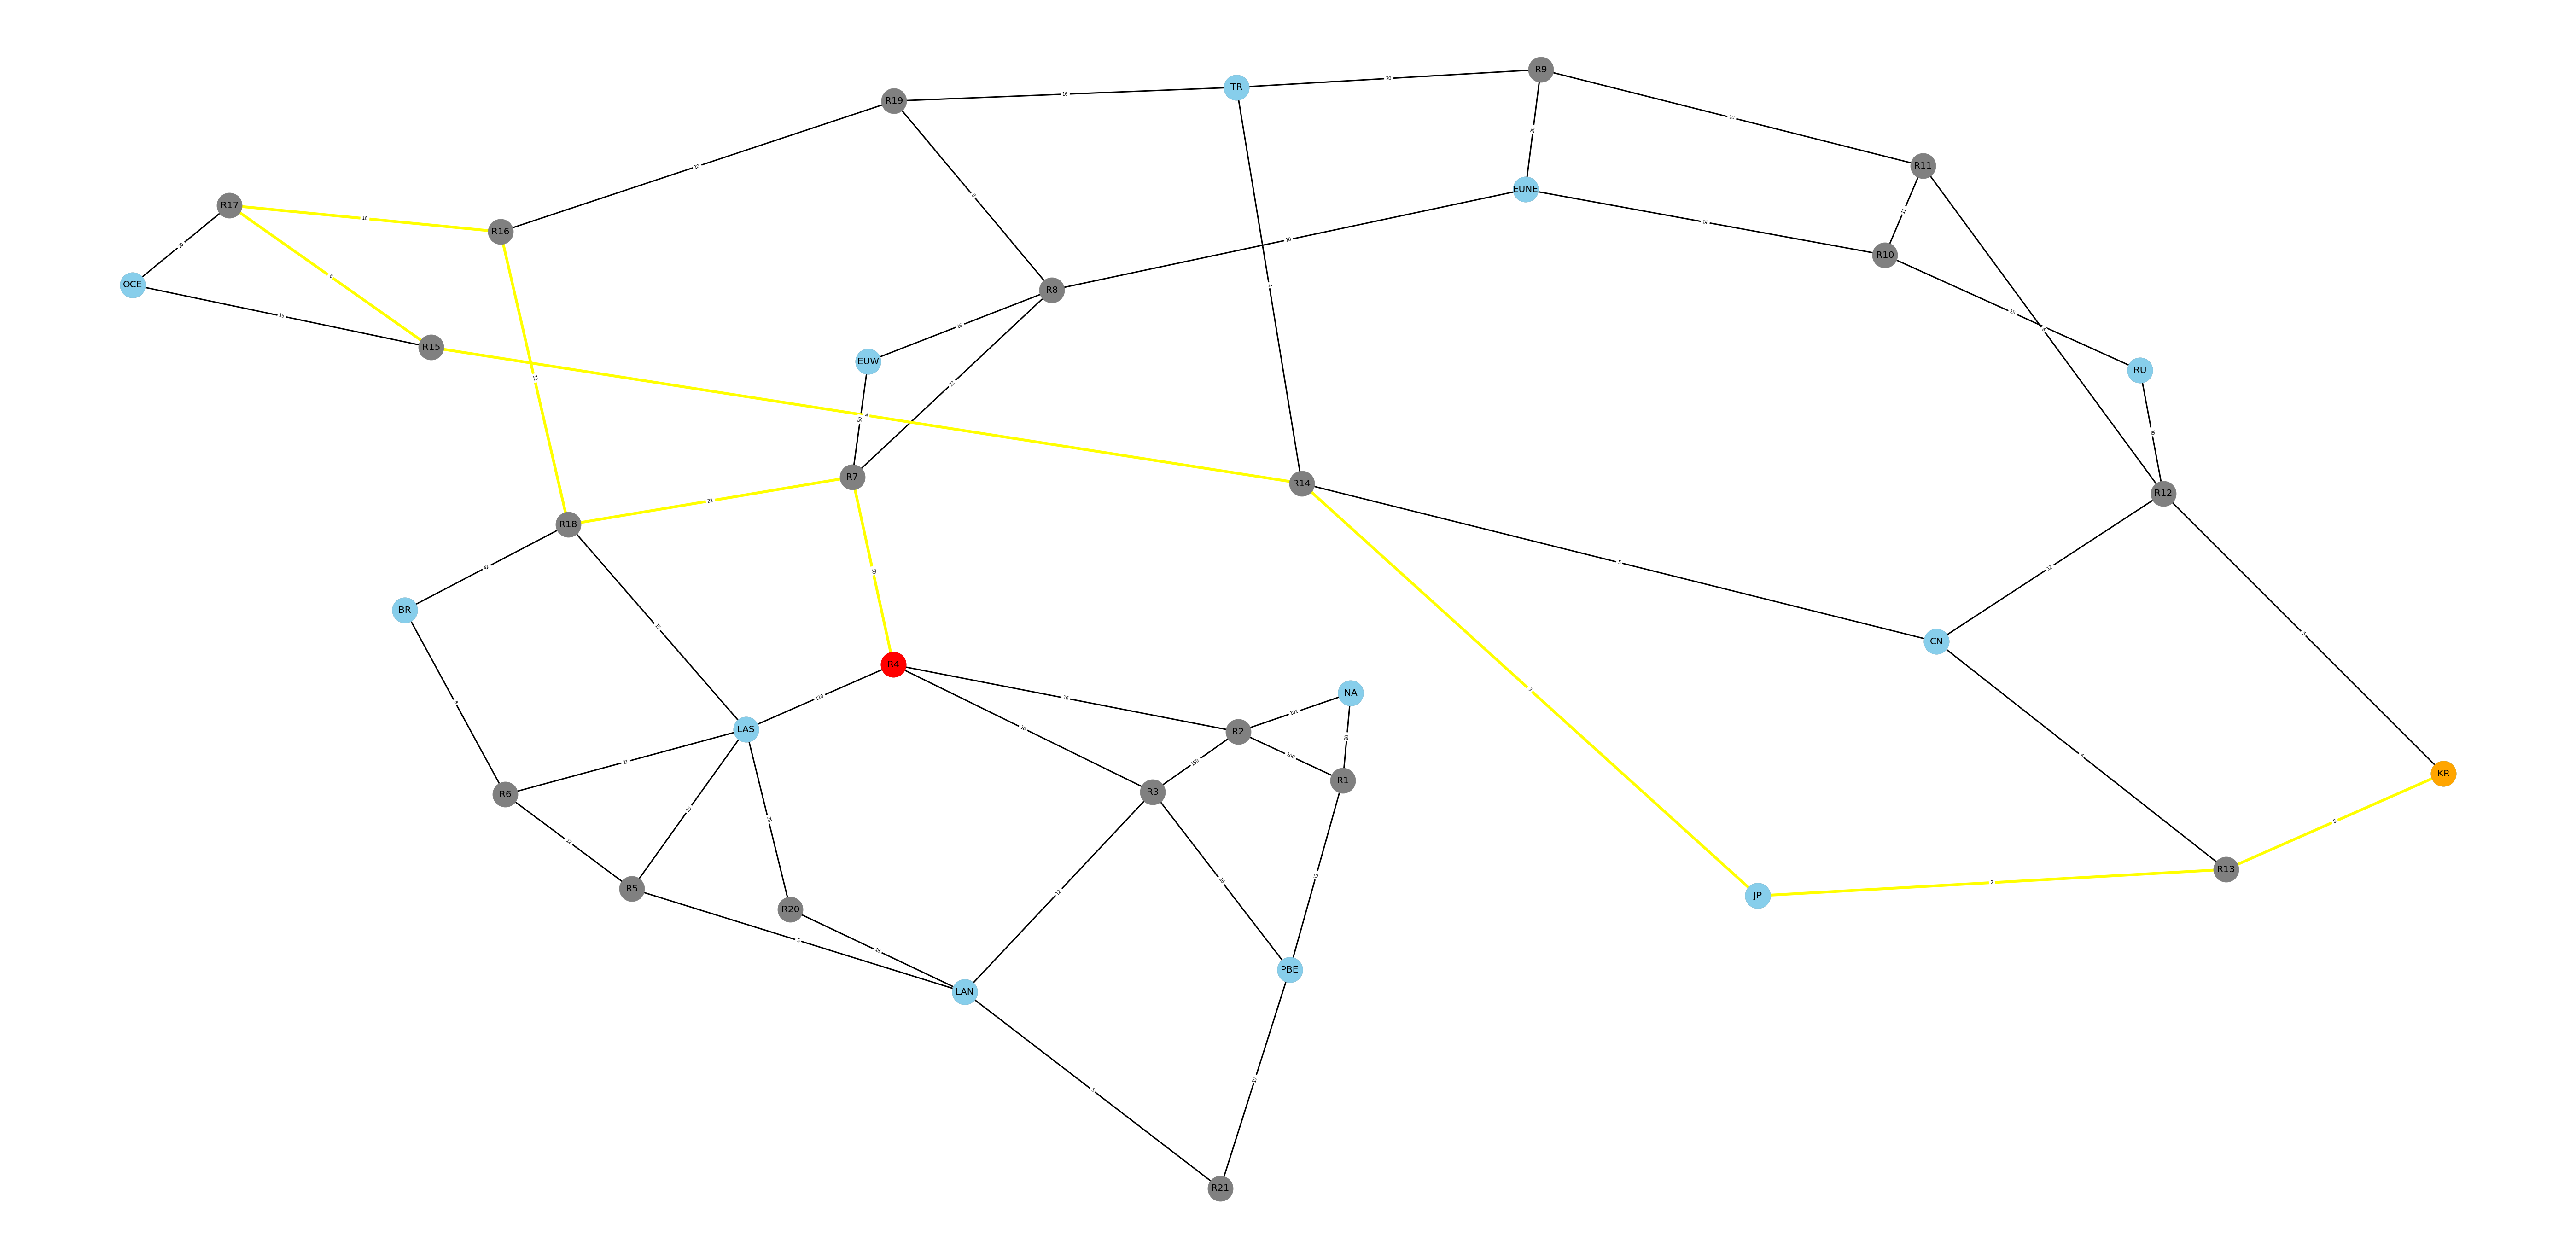

Shortest Path to play on  PBE :   R4 -> R3 -> PBE
in 34 ms

					Graph for PBE : 


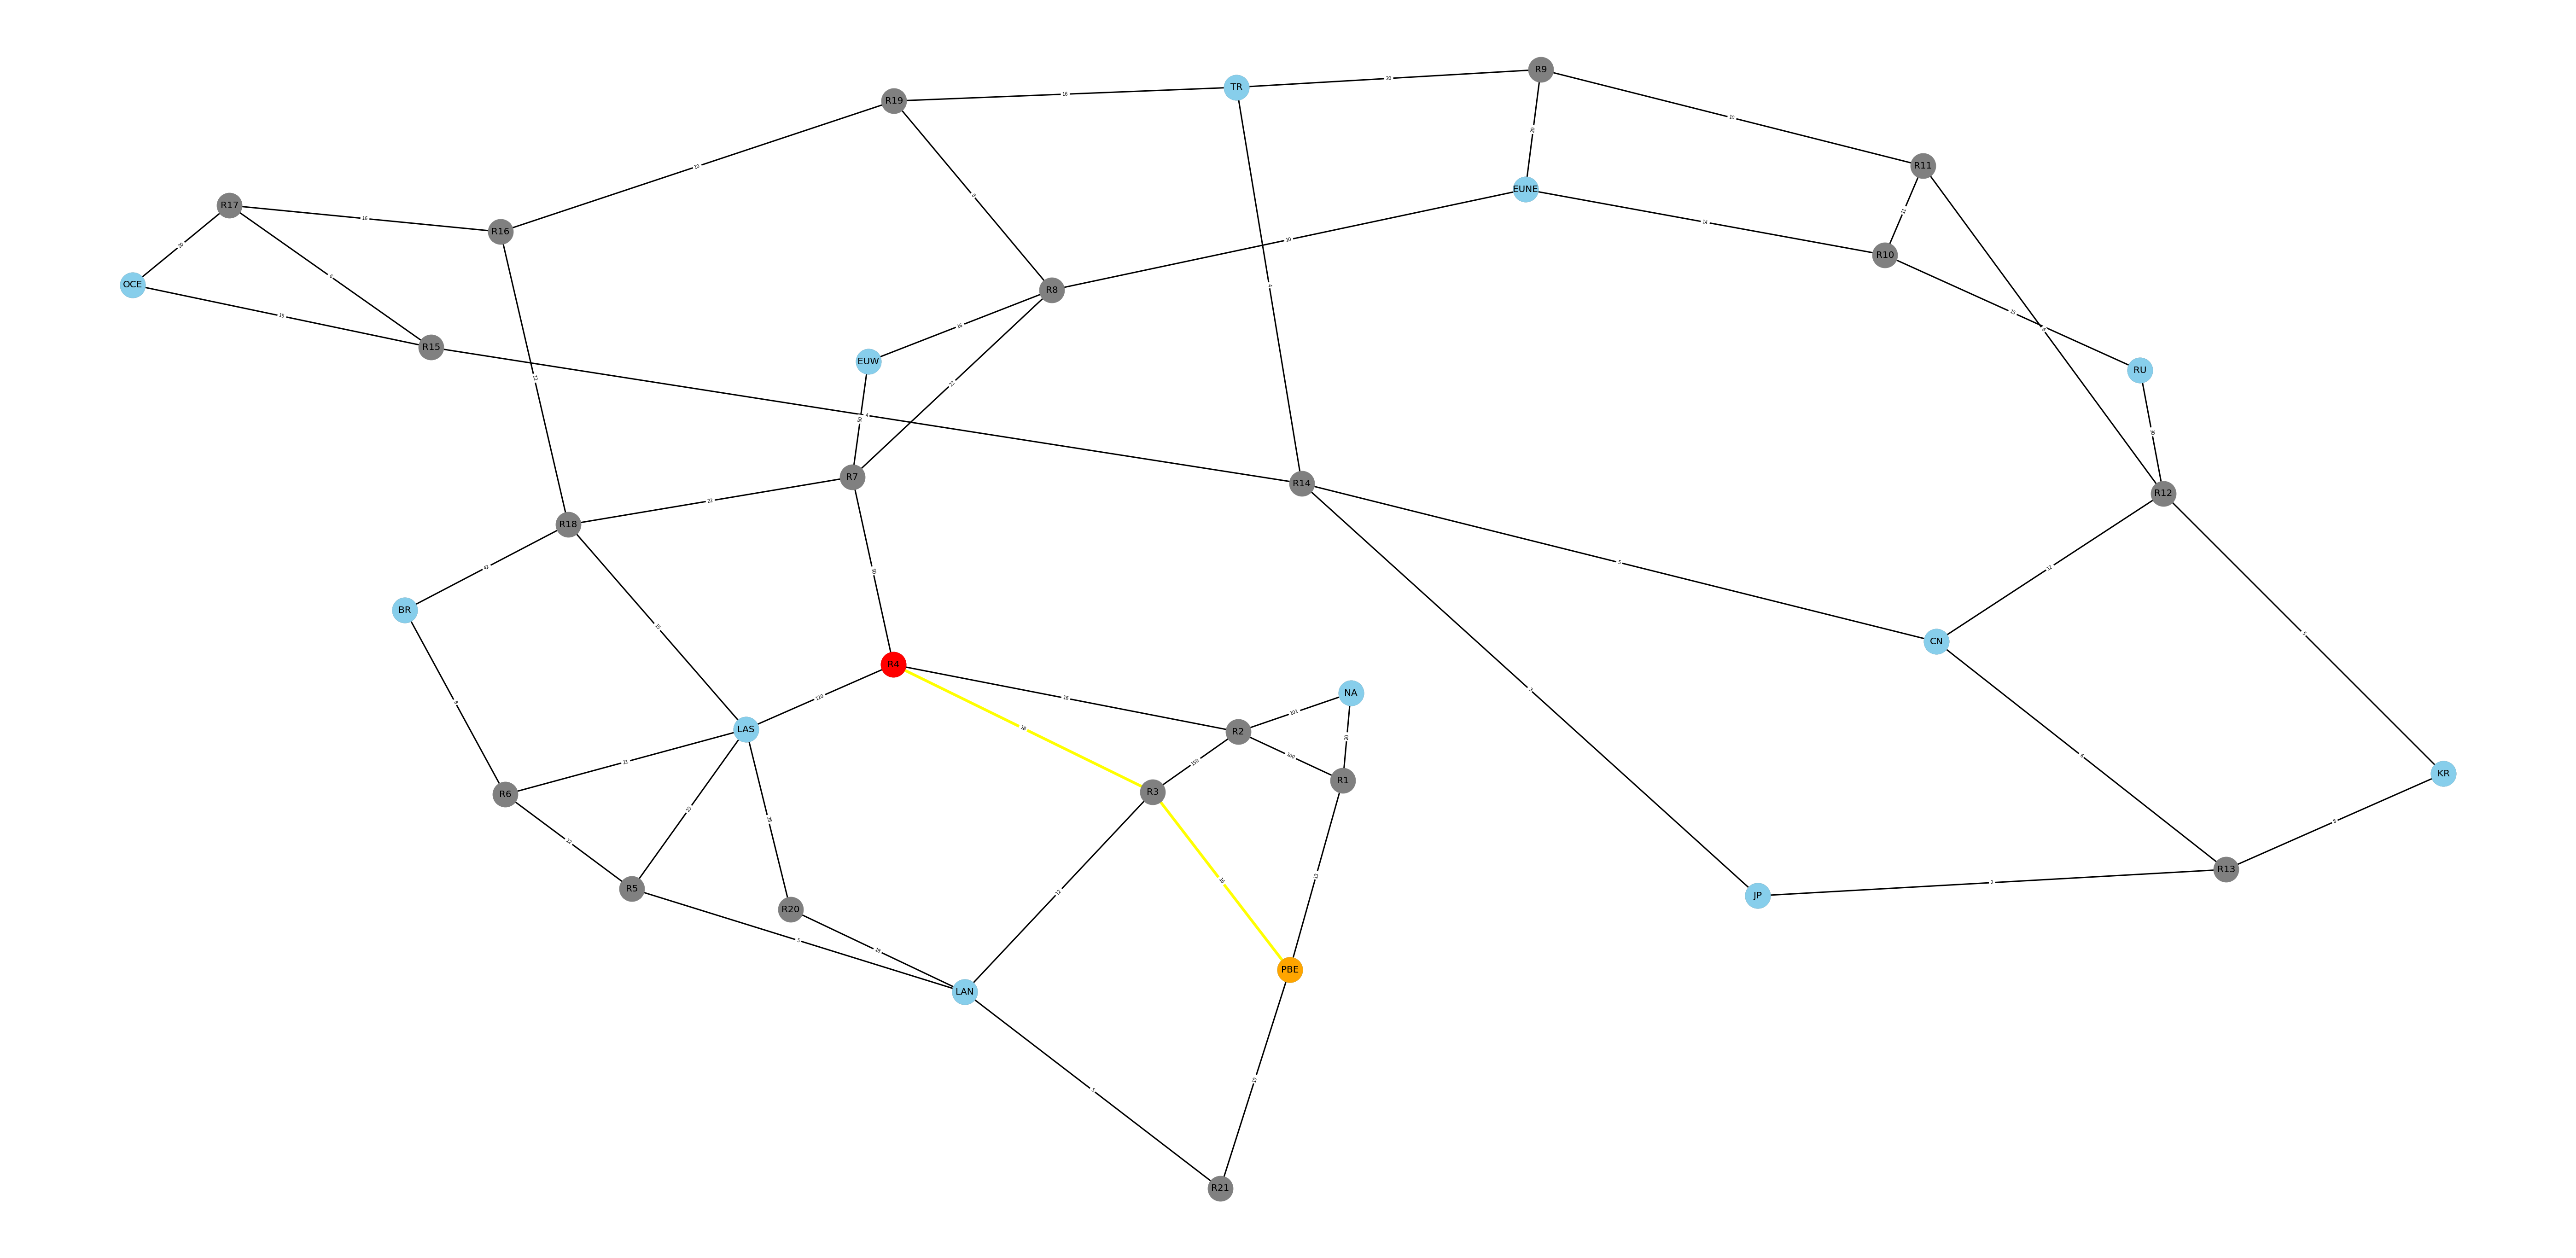

Shortest Path to play on  CN :   R4 -> R7 -> R18 -> R16 -> R17 -> R15 -> R14 -> CN
in 115 ms

					Graph for CN : 


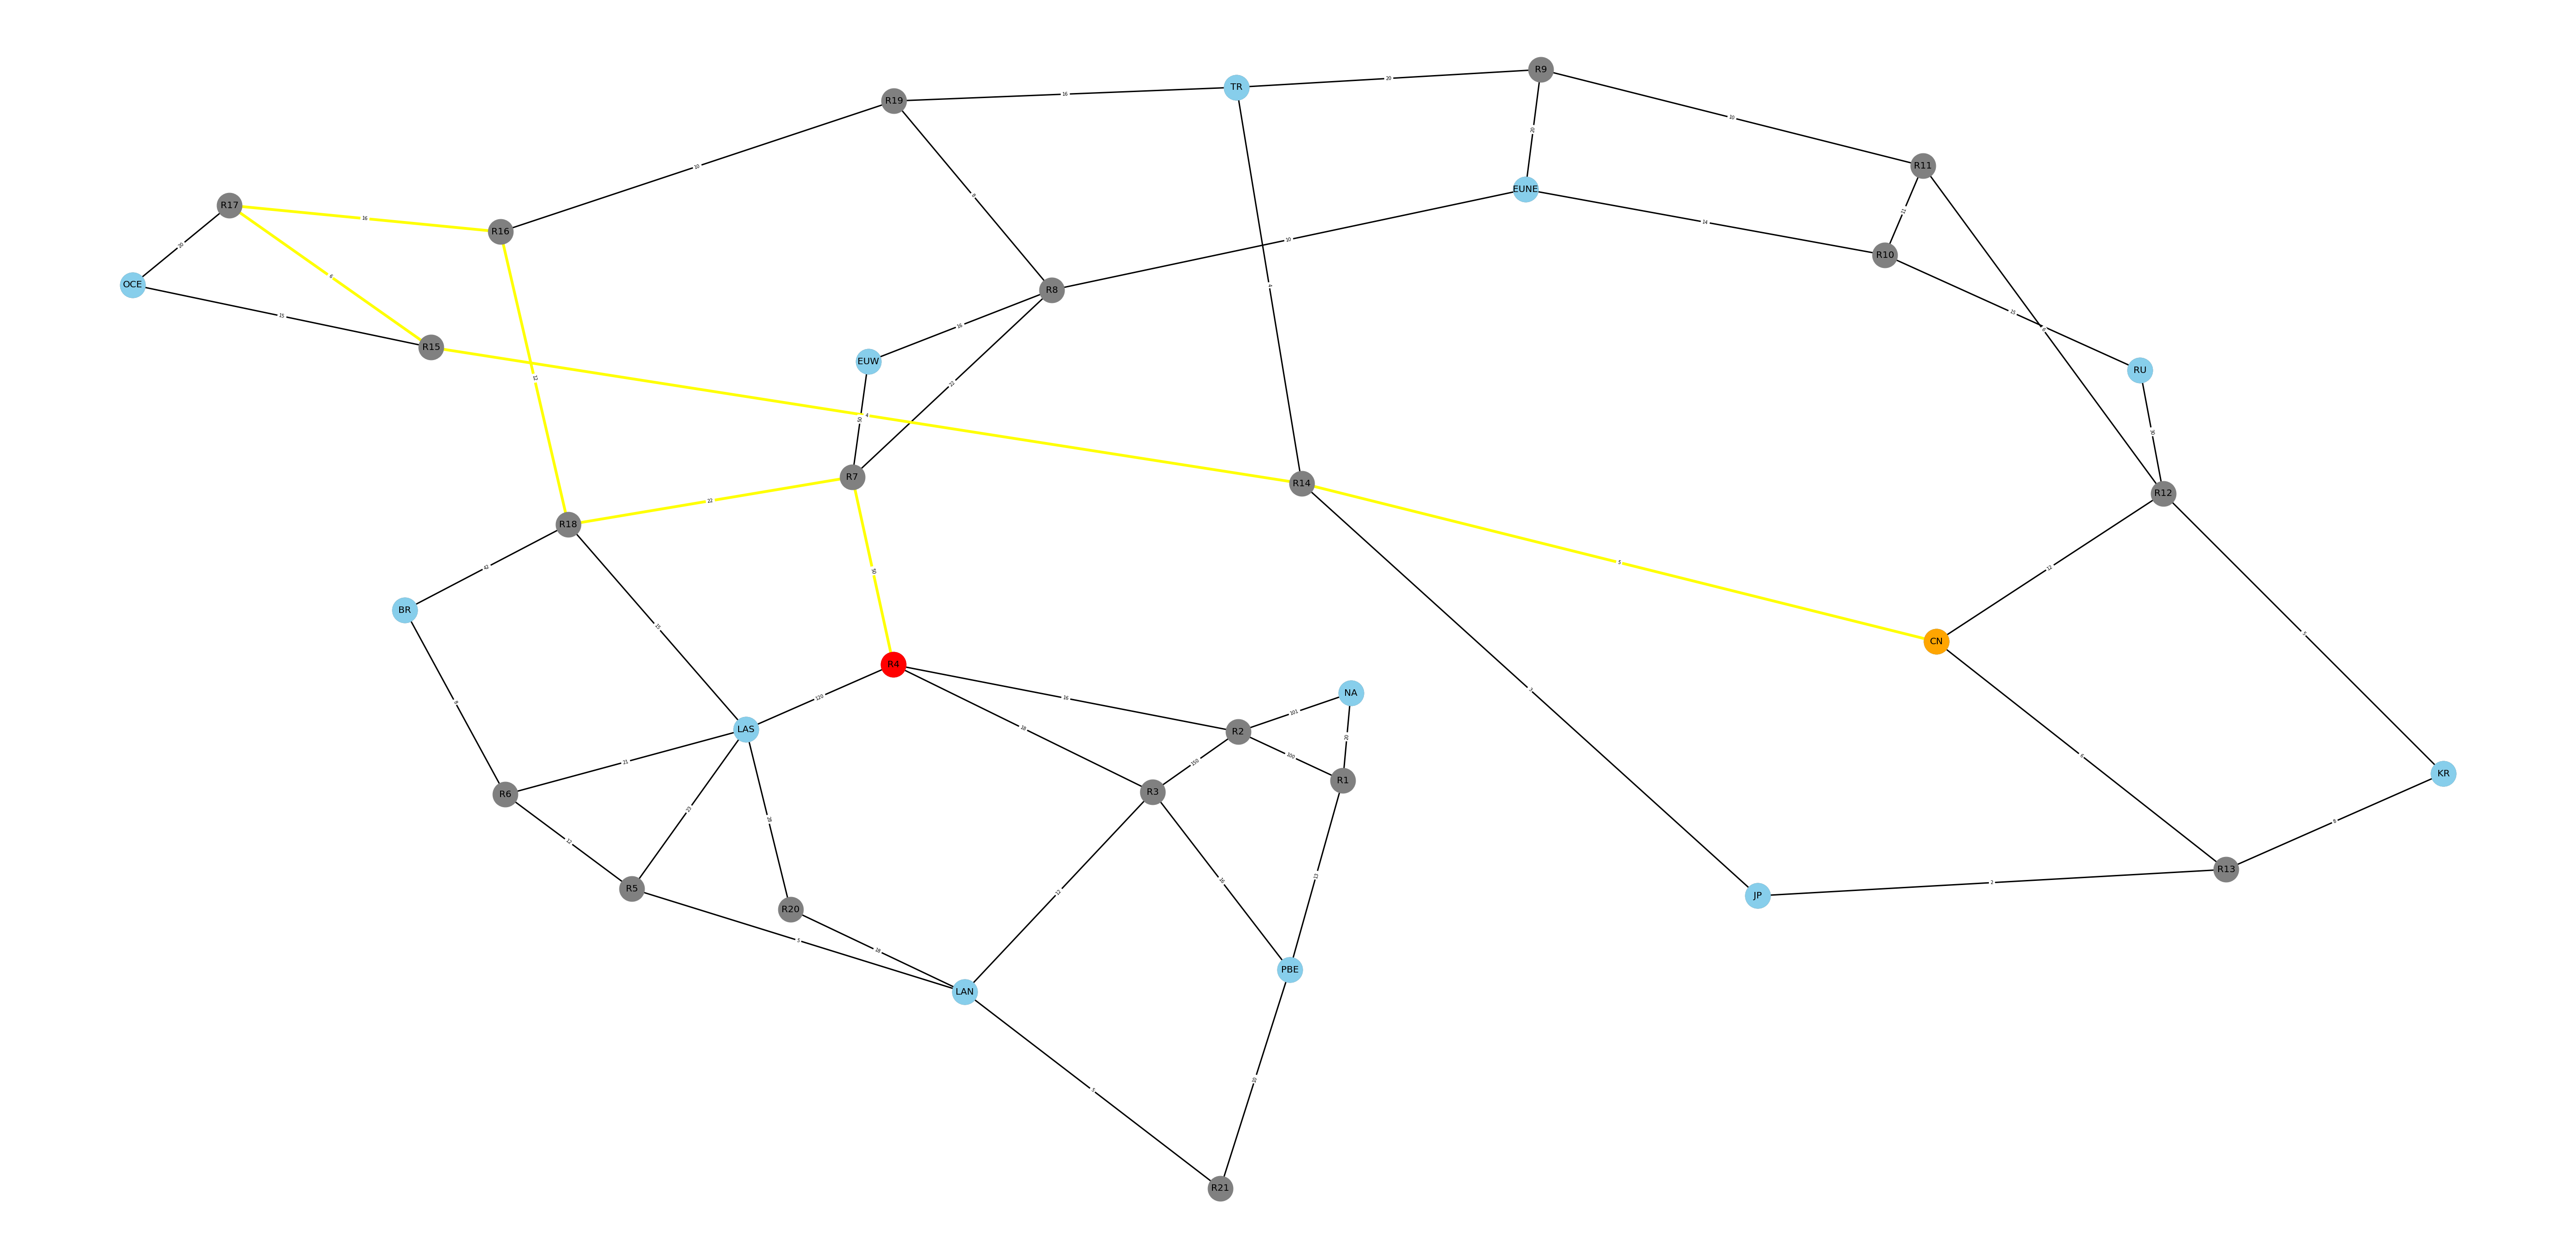


 
The best server is LAN with ping of 30 ms , via this path :     R4 -> R3 -> LAN

					Graph for LAN : 


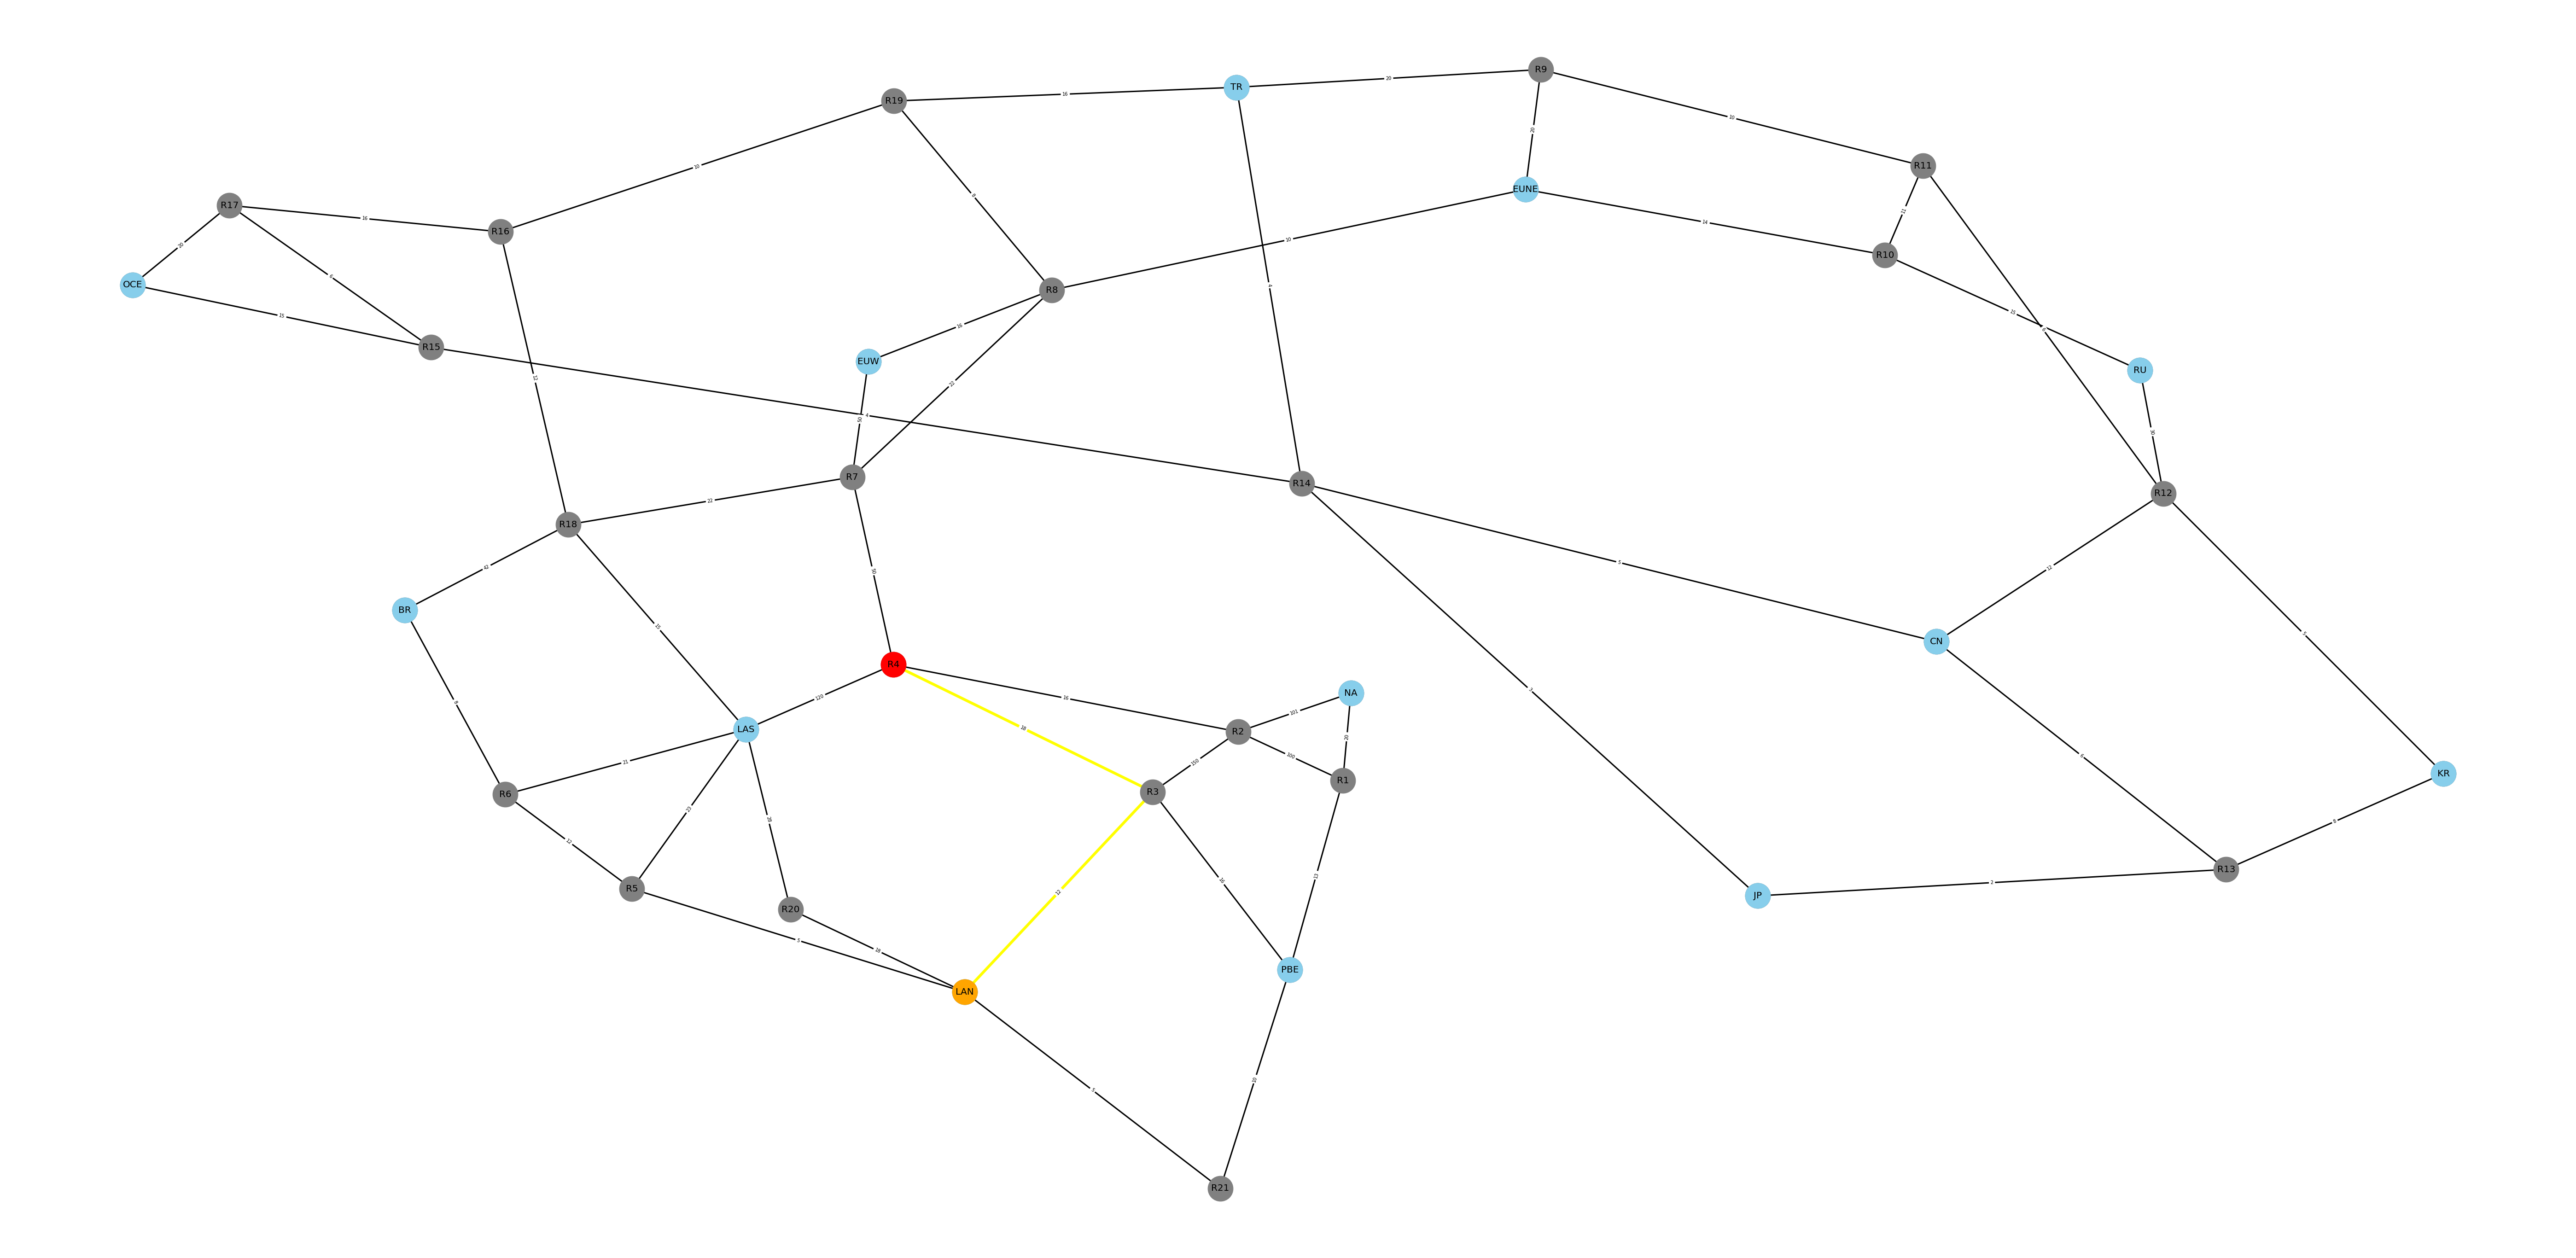

In [4]:
#creating a graph object using networkx laberary and add edges to it
G=nx.Graph()
for k, v in graph.items():
    for key in v:
        G.add_edge(k,key,weight=v[key])
        
#select the starting router        
print("Enter a Router(R1->R21) to connect with : ")
source=str(input())
while source not in Routers:
    print("Enter a Router(R1->R21) to connect with : ")
    source=str(input())


#set positions for all nodes using spring layout
pos=nx.spring_layout(G) 

#call draw_graph function to visualise the graph  
print("\n\n\t\tfor better visualisation the graph will be saved as a png file in the project folder\n\n")
draw_graph(G,pos,edgelist=G.edges(data=True) )

tmp_graph=graph.copy()
#initialize best server and best ping and best path 
best_server=Servers[0]
best_ping,best_path=dijkstra(tmp_graph,source,best_server)

#looping through servers and choosing the best one
for target in Servers:
    
    tmp_graph=graph.copy()  
    
    tmp_best_ping,tmp_best_path=dijkstra(tmp_graph,source,target)
    
    if(best_ping>tmp_best_ping):
        
        best_ping=tmp_best_ping
        best_server=target
        best_path=tmp_best_path
    
    print("Shortest Path to play on  {} :".format(target),end=" ")
    show_path(tmp_best_path)
    print("in {} ms".format(tmp_best_ping))
     
    draw_graph(G,pos,edgelist=G.edges(data=True) ,path_nodes=tmp_best_path,Target=target)
    
print("\n \nThe best server is {} with ping of {} ms , via this path :  ".format(best_server,best_ping),end=" ")
show_path(best_path)

draw_graph(G,pos,edgelist=G.edges(data=True) ,path_nodes=best_path,Target=best_server)
